In [1]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 104.9 MB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 54.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install mlflow --user

Note: you may need to restart the kernel to use updated packages.


In [1]:
import mlflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support,r2_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from collections import defaultdict
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge,SGDRegressor
from collections import defaultdict
from sklearn.decomposition import NMF
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
df=pd.read_csv('cars_data_clean.csv')
df_train=df.drop("listed_price",axis=1)
output_col=pd.DataFrame(df['listed_price'])

In [3]:
df_train

,usedCarSkuId,loc,myear,body,transmission,fuel,km,ip,images,imgCount,...,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,7111bf25-97af-47f9-867b-40879190d800,gomti nagar,2016,hatchback,manual,cng,69162.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,c309efc1-efaf-4f82-81ad-dcb38eb36665,borivali west,2015,hatchback,manual,cng,45864.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,Gasoline Port Injection,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
2,7609f710-0c97-4f00-9a47-9b9284b62d3a,jasola,2015,sedan,manual,cng,81506.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,NaN,NaN,NaN,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN
3,278b76e3-5539-4a5e-ae3e-353a2e3b6d7d,jasola,2013,hatchback,manual,cng,115893.0,0,[{'img': ''}],0,...,Multi-Point Fuel Injection,NaN,13.0,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN
4,b1eab99b-a606-48dd-a75b-57feb8a9ad92,mumbai g.p.o.,2022,muv,manual,cng,18900.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,6,...,NaN,12.0,NaN,NaN,86.63,5500.0,121.5,4200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,ee6ce523-2aa6-4852-96a1-86b9bc277377,thathawade,2018,suv,manual,diesel,49882.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,Common Rail Injection,NaN,16.0,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5
37809,ba1994ac-53ab-4baf-913e-b72f01a37b5d,kharadi,2011,sedan,manual,diesel,82843.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,27,...,Common Rail Injection,NaN,15.0,NaN,88.80,4000.0,200.0,2375.0,NaN,NaN
37810,8f4448ae-53f5-4a3f-b13d-2401dd60c624,kothrud,2020,hatchback,manual,diesel,58000.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,11,...,NaN,NaN,16.0,NaN,88.77,4000.0,200.0,2125.0,NaN,NaN
37811,dbf9b629-7215-494b-a62d-ba1408531362,kothrud,2014,hatchback,manual,diesel,62000.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,8,...,Common Rail Injection,NaN,NaN,NaN,69.00,4000.0,140.0,2400.0,NaN,NaN


In [4]:
df_train.dtypes

usedCarSkuId             object
loc                      object
myear                     int64
body                     object
transmission             object
                         ...   
Max Power At            float64
Max Torque Delivered    float64
Max Torque At           float64
Bore                    float64
Stroke                  float64
Length: 65, dtype: object

## Cleaning the dataset

In [5]:
for col in df_train.select_dtypes(exclude=np.number):
    print("Column name is ",col)
    print(df_train[col].value_counts())
    print()

Column name is  usedCarSkuId
usedCarSkuId
7111bf25-97af-47f9-867b-40879190d800    1
fb33ecc9-4579-4919-8bb8-1c9a27431a5c    1
fe73c0a3-8f17-4877-9206-0796e618cef0    1
e4698829-42f5-41d8-b7cf-fceade705858    1
57d50729-c8a6-42f7-8c1a-5a41d0df2f07    1
                                       ..
f426922b-f024-4fd4-8fb8-41903971e33d    1
cd9e83d3-2fc5-4f06-8933-8b4ee460ae36    1
e84161e8-6b79-48e9-9430-f1473ff1b85e    1
7e0e6c89-ef58-4160-9d9e-c3bc77a9b708    1
a96fbcd7-c183-4829-ae97-b2581afe4bac    1
Name: count, Length: 37813, dtype: int64

Column name is  loc
loc
pune city             3483
gurgaon               2760
bangalore city        2497
new delhi g.p.o.      2349
mahadevapura          1137
                      ... 
thiruvananthapuram       1
aruvikuzhy               1
dapodi                   1
ambawali                 1
palarivattom             1
Name: count, Length: 397, dtype: int64

Column name is  body
body
hatchback          15053
sedan              10543
suv              

In [6]:
for col in df_train.select_dtypes(exclude=np.number):
    print("Column ",col," has ",len(df_train[col].value_counts().index)," categories" )
    print()


Column  usedCarSkuId  has  37813  categories

Column  loc  has  397  categories

Column  body  has  11  categories

Column  transmission  has  2  categories

Column  fuel  has  5  categories

Column  images  has  37135  categories

Column  threesixty  has  2  categories

Column  dvn  has  4128  categories

Column  oem  has  46  categories

Column  model  has  382  categories

Column  variant  has  3430  categories

Column  City  has  617  categories

Column  utype  has  2  categories

Column  carType  has  3  categories

Column  top_features  has  400  categories

Column  comfort_features  has  2016  categories

Column  interior_features  has  527  categories

Column  exterior_features  has  1893  categories

Column  safety_features  has  2116  categories

Column  Color  has  747  categories

Column  Engine Type  has  566  categories

Column  Valve Configuration  has  5  categories

Column  Turbo Charger  has  2  categories

Column  Super Charger  has  2  categories

Column  Gear Box  

In [7]:
df_train['model_type_new'].value_counts()

model_type_new
used    37813
Name: count, dtype: int64

In [8]:
for col in df_train.columns:
   
    print("Col name is ",col,df_train[col][0])
    print()

Col name is  usedCarSkuId 7111bf25-97af-47f9-867b-40879190d800

Col name is  loc gomti nagar

Col name is  myear 2016

Col name is  body hatchback

Col name is  transmission manual

Col name is  fuel cng

Col name is  km 69162.0

Col name is  ip 0

Col name is  images [{'img': 'https://images10.gaadi.com/usedcar_image/original/usedcar_0_734841676968137_1676968151.jpeg?imwidth=640'}]

Col name is  imgCount 15

Col name is  threesixty False

Col name is  dvn maruti wagon r lxi cng

Col name is  oem maruti

Col name is  model maruti wagon r

Col name is  variant lxi cng

Col name is  City lucknow

Col name is  discountValue 0

Col name is  utype dealer

Col name is  carType corporate

Col name is  top_features ['power steering', 'power windows front', 'air conditioner', 'heater', 'adjustable head lights', 'manually adjustable exterior rear view mirror', 'centeral locking', 'child safety locks', 'number of speaker']

Col name is  comfort_features ['power steering', 'power windows front', '

In [9]:
for col in df_train.select_dtypes(exclude=np.number):
    if len(df_train[col].value_counts().index)==len(df_train):
        
        print(col)


usedCarSkuId


In [10]:
df_train.drop(['usedCarSkuId','images'],axis=1,inplace=True)


In [11]:
df_train

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,...,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,gomti nagar,2016,hatchback,manual,cng,69162.0,0,15,False,maruti wagon r lxi cng,...,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,borivali west,2015,hatchback,manual,cng,45864.0,0,15,False,maruti celerio green vxi,...,Gasoline Port Injection,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
2,jasola,2015,sedan,manual,cng,81506.0,0,15,False,honda amaze s plus i-vtec,...,NaN,NaN,NaN,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN
3,jasola,2013,hatchback,manual,cng,115893.0,0,0,False,maruti wagon r lxi cng,...,Multi-Point Fuel Injection,NaN,13.0,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN
4,mumbai g.p.o.,2022,muv,manual,cng,18900.0,0,6,False,maruti ertiga vxi cng,...,NaN,12.0,NaN,NaN,86.63,5500.0,121.5,4200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,thathawade,2018,suv,manual,diesel,49882.0,0,15,False,tata nexon 1.5 revotorq xz plus,...,Common Rail Injection,NaN,16.0,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5
37809,kharadi,2011,sedan,manual,diesel,82843.0,0,27,False,tata manza aura quadrajet bs iv,...,Common Rail Injection,NaN,15.0,NaN,88.80,4000.0,200.0,2375.0,NaN,NaN
37810,kothrud,2020,hatchback,manual,diesel,58000.0,0,11,False,tata altroz xz diesel,...,NaN,NaN,16.0,NaN,88.77,4000.0,200.0,2125.0,NaN,NaN
37811,kothrud,2014,hatchback,manual,diesel,62000.0,0,8,False,tata indica ev2 ls,...,Common Rail Injection,NaN,NaN,NaN,69.00,4000.0,140.0,2400.0,NaN,NaN


In [12]:
df_train.dtypes

loc                      object
myear                     int64
body                     object
transmission             object
fuel                     object
                         ...   
Max Power At            float64
Max Torque Delivered    float64
Max Torque At           float64
Bore                    float64
Stroke                  float64
Length: 63, dtype: object

In [13]:
categorical_columns=df_train.select_dtypes(exclude=np.number).columns
numerical_columns=df_train.select_dtypes(include=np.number).columns


## Exploratory Data Analysis


### 1. First step is to see the type of columns so that we could conclude that even now some columns needs to be appropriated.


In [258]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37813 entries, 0 to 37812
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loc                       31963 non-null  object 
 1   myear                     37813 non-null  int64  
 2   body                      37794 non-null  object 
 3   transmission              37813 non-null  object 
 4   fuel                      37813 non-null  object 
 5   km                        37813 non-null  float64
 6   ip                        37813 non-null  int64  
 7   imgCount                  37813 non-null  int64  
 8   threesixty                37813 non-null  bool   
 9   dvn                       37813 non-null  object 
 10  oem                       37813 non-null  object 
 11  model                     37813 non-null  object 
 12  variant                   37813 non-null  object 
 13  City                      37813 non-null  object 
 14  discou

### 2. NULL Values . First step is to see the Null Values


In [259]:
df_train.isnull().sum()

loc                      5850
myear                       0
body                       19
transmission                0
fuel                        0
                        ...  
Max Power At             2247
Max Torque Delivered      231
Max Torque At            1976
Bore                    25177
Stroke                  37300
Length: 63, dtype: int64

<Axes: >

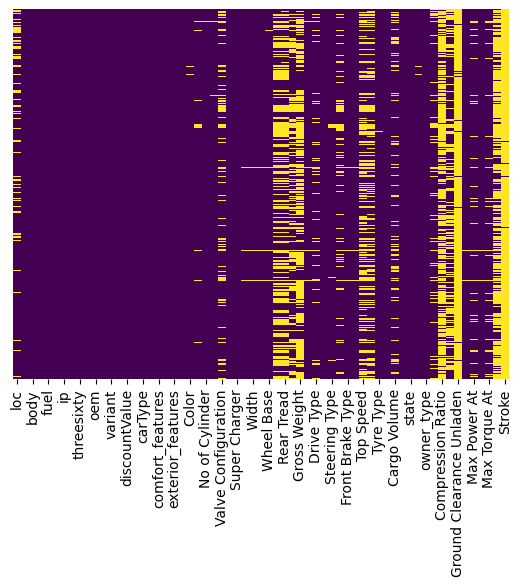

In [260]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### 3. Next step is to see the collinearity. We will use the spearman correlation since even if the dataset is spreaded we can see the correlation very easily. |

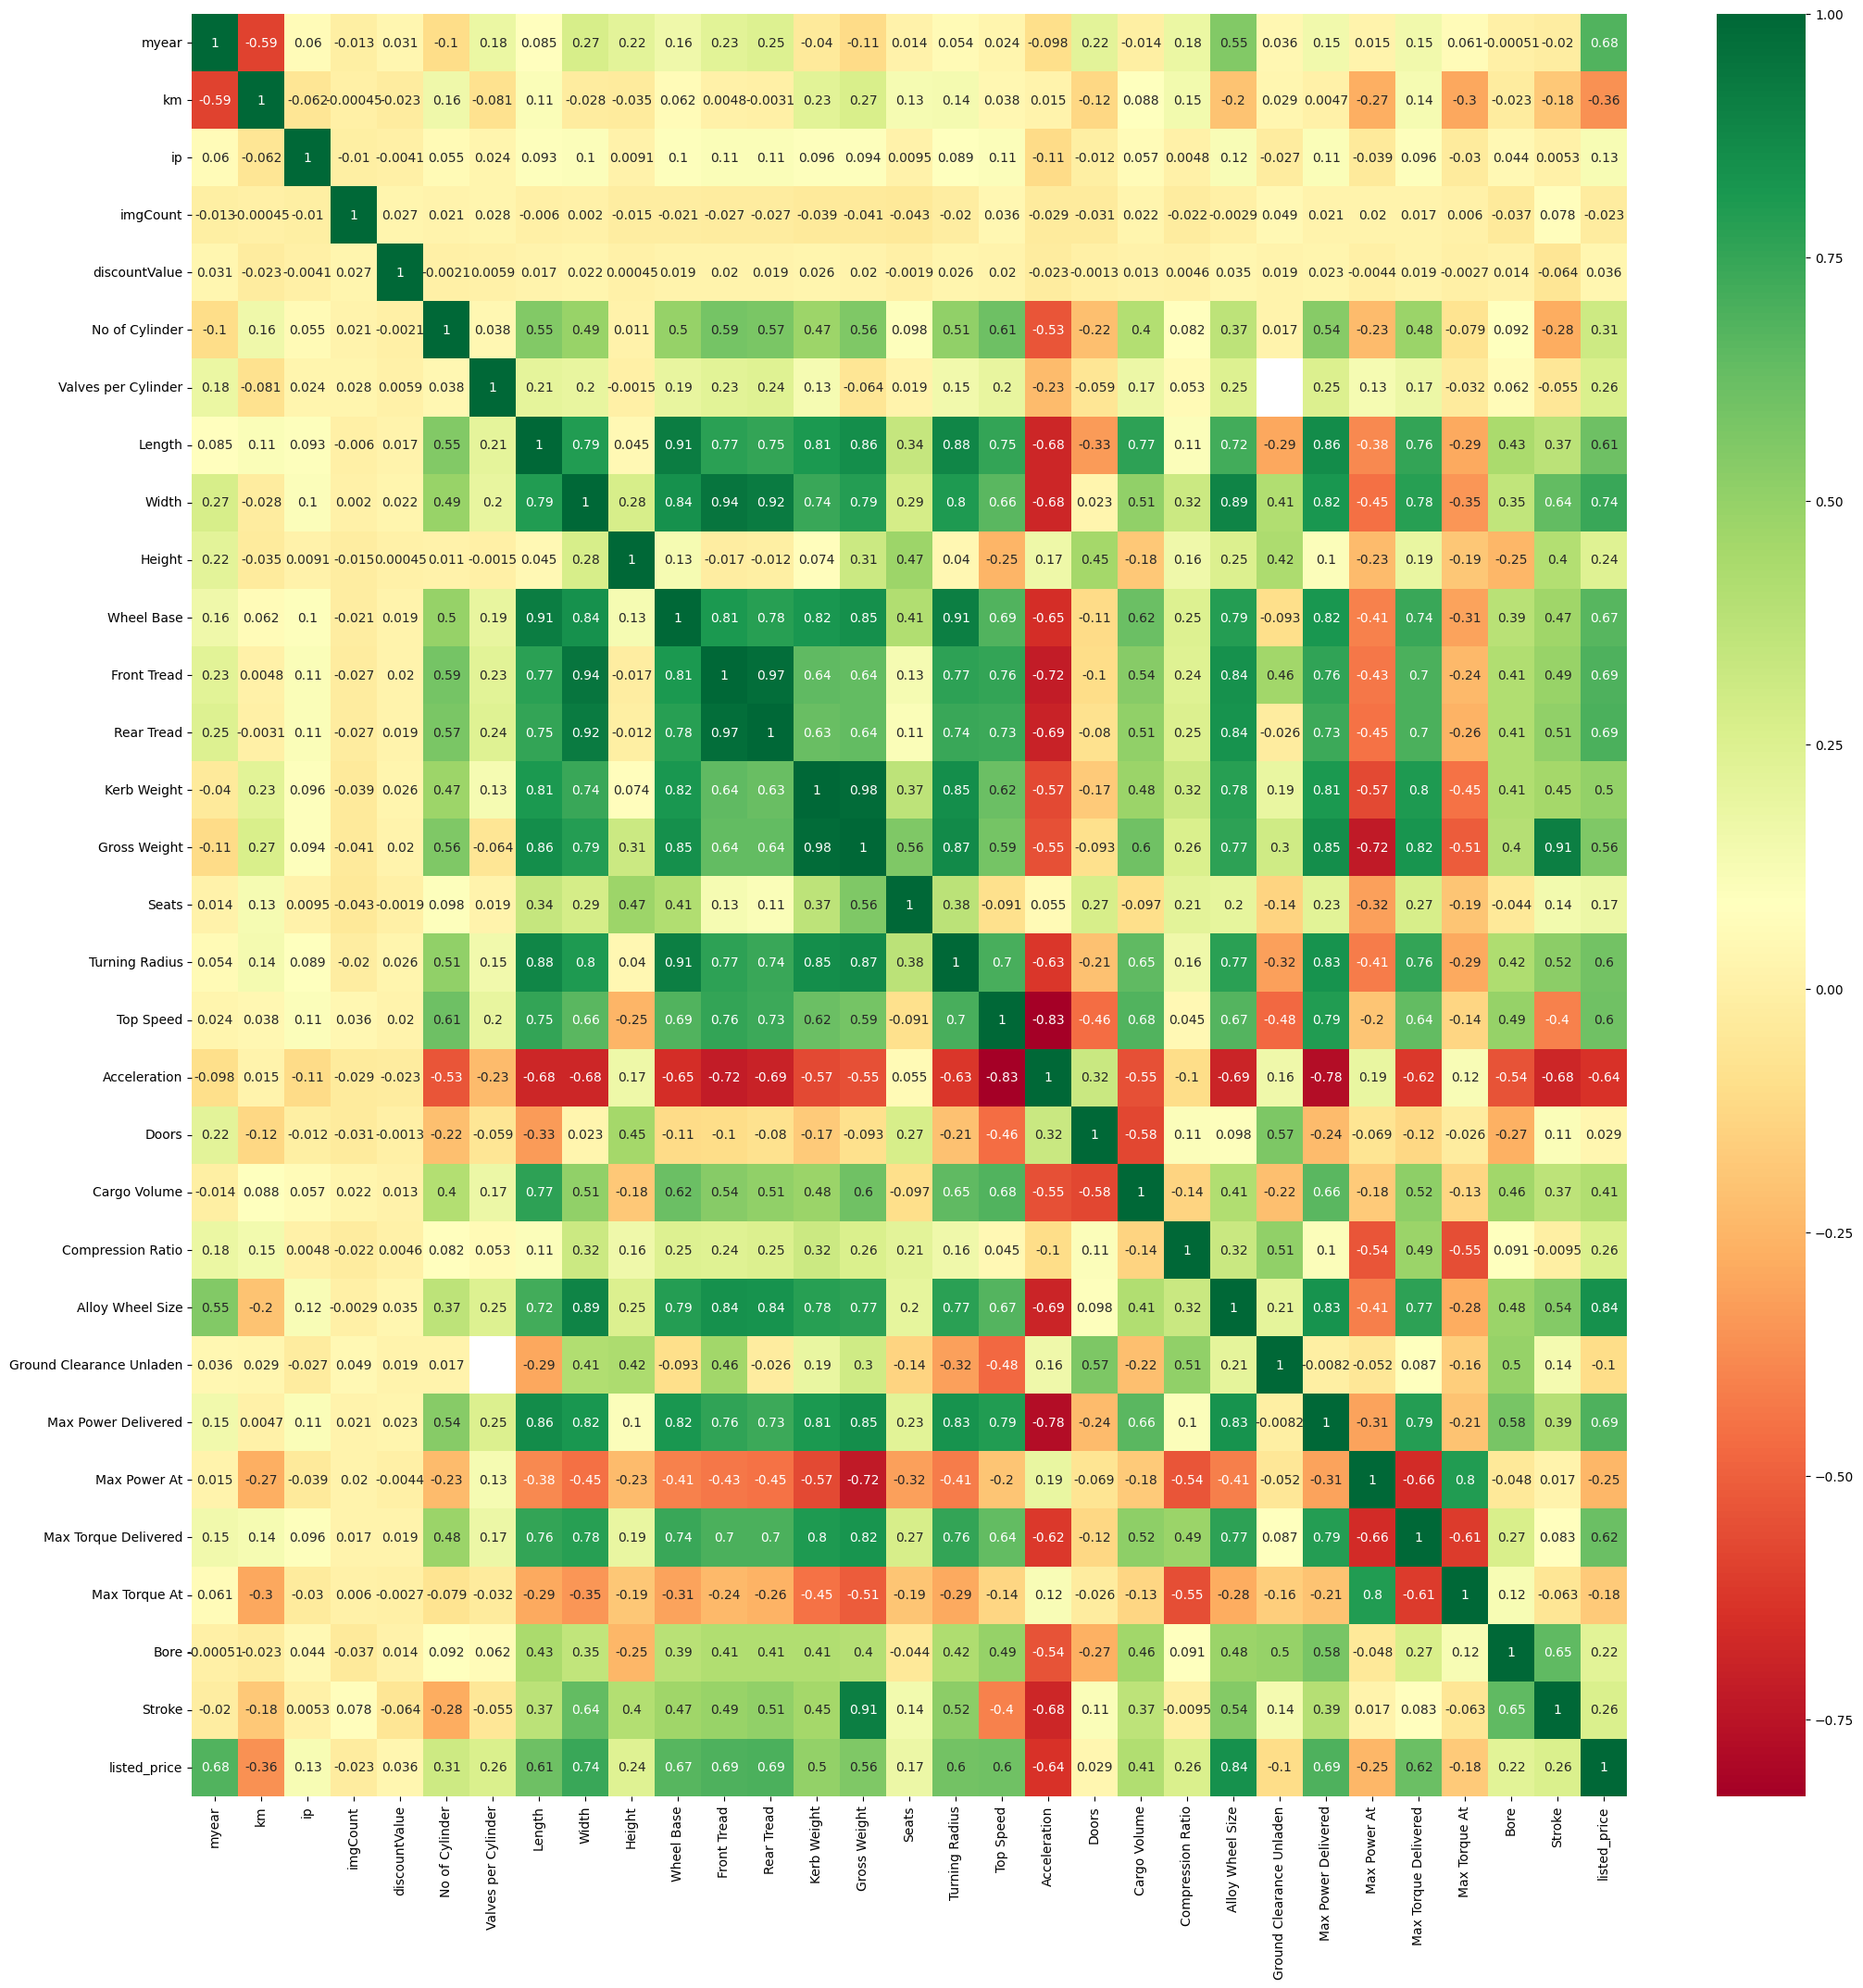

In [261]:
plt.figure(figsize=(25,25))
sns.heatmap(pd.concat([df_train,output_col],axis=1).select_dtypes(include=np.number).corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

In [262]:
df_train

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,...,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,gomti nagar,2016,hatchback,manual,cng,69162.0,0,15,False,maruti wagon r lxi cng,...,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,borivali west,2015,hatchback,manual,cng,45864.0,0,15,False,maruti celerio green vxi,...,Gasoline Port Injection,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
2,jasola,2015,sedan,manual,cng,81506.0,0,15,False,honda amaze s plus i-vtec,...,NaN,NaN,NaN,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN
3,jasola,2013,hatchback,manual,cng,115893.0,0,0,False,maruti wagon r lxi cng,...,Multi-Point Fuel Injection,NaN,13.0,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN
4,mumbai g.p.o.,2022,muv,manual,cng,18900.0,0,6,False,maruti ertiga vxi cng,...,NaN,12.0,NaN,NaN,86.63,5500.0,121.5,4200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,thathawade,2018,suv,manual,diesel,49882.0,0,15,False,tata nexon 1.5 revotorq xz plus,...,Common Rail Injection,NaN,16.0,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5
37809,kharadi,2011,sedan,manual,diesel,82843.0,0,27,False,tata manza aura quadrajet bs iv,...,Common Rail Injection,NaN,15.0,NaN,88.80,4000.0,200.0,2375.0,NaN,NaN
37810,kothrud,2020,hatchback,manual,diesel,58000.0,0,11,False,tata altroz xz diesel,...,NaN,NaN,16.0,NaN,88.77,4000.0,200.0,2125.0,NaN,NaN
37811,kothrud,2014,hatchback,manual,diesel,62000.0,0,8,False,tata indica ev2 ls,...,Common Rail Injection,NaN,NaN,NaN,69.00,4000.0,140.0,2400.0,NaN,NaN


In [263]:
len(numerical_columns)

30

### 4. Next step is to see the outliers.


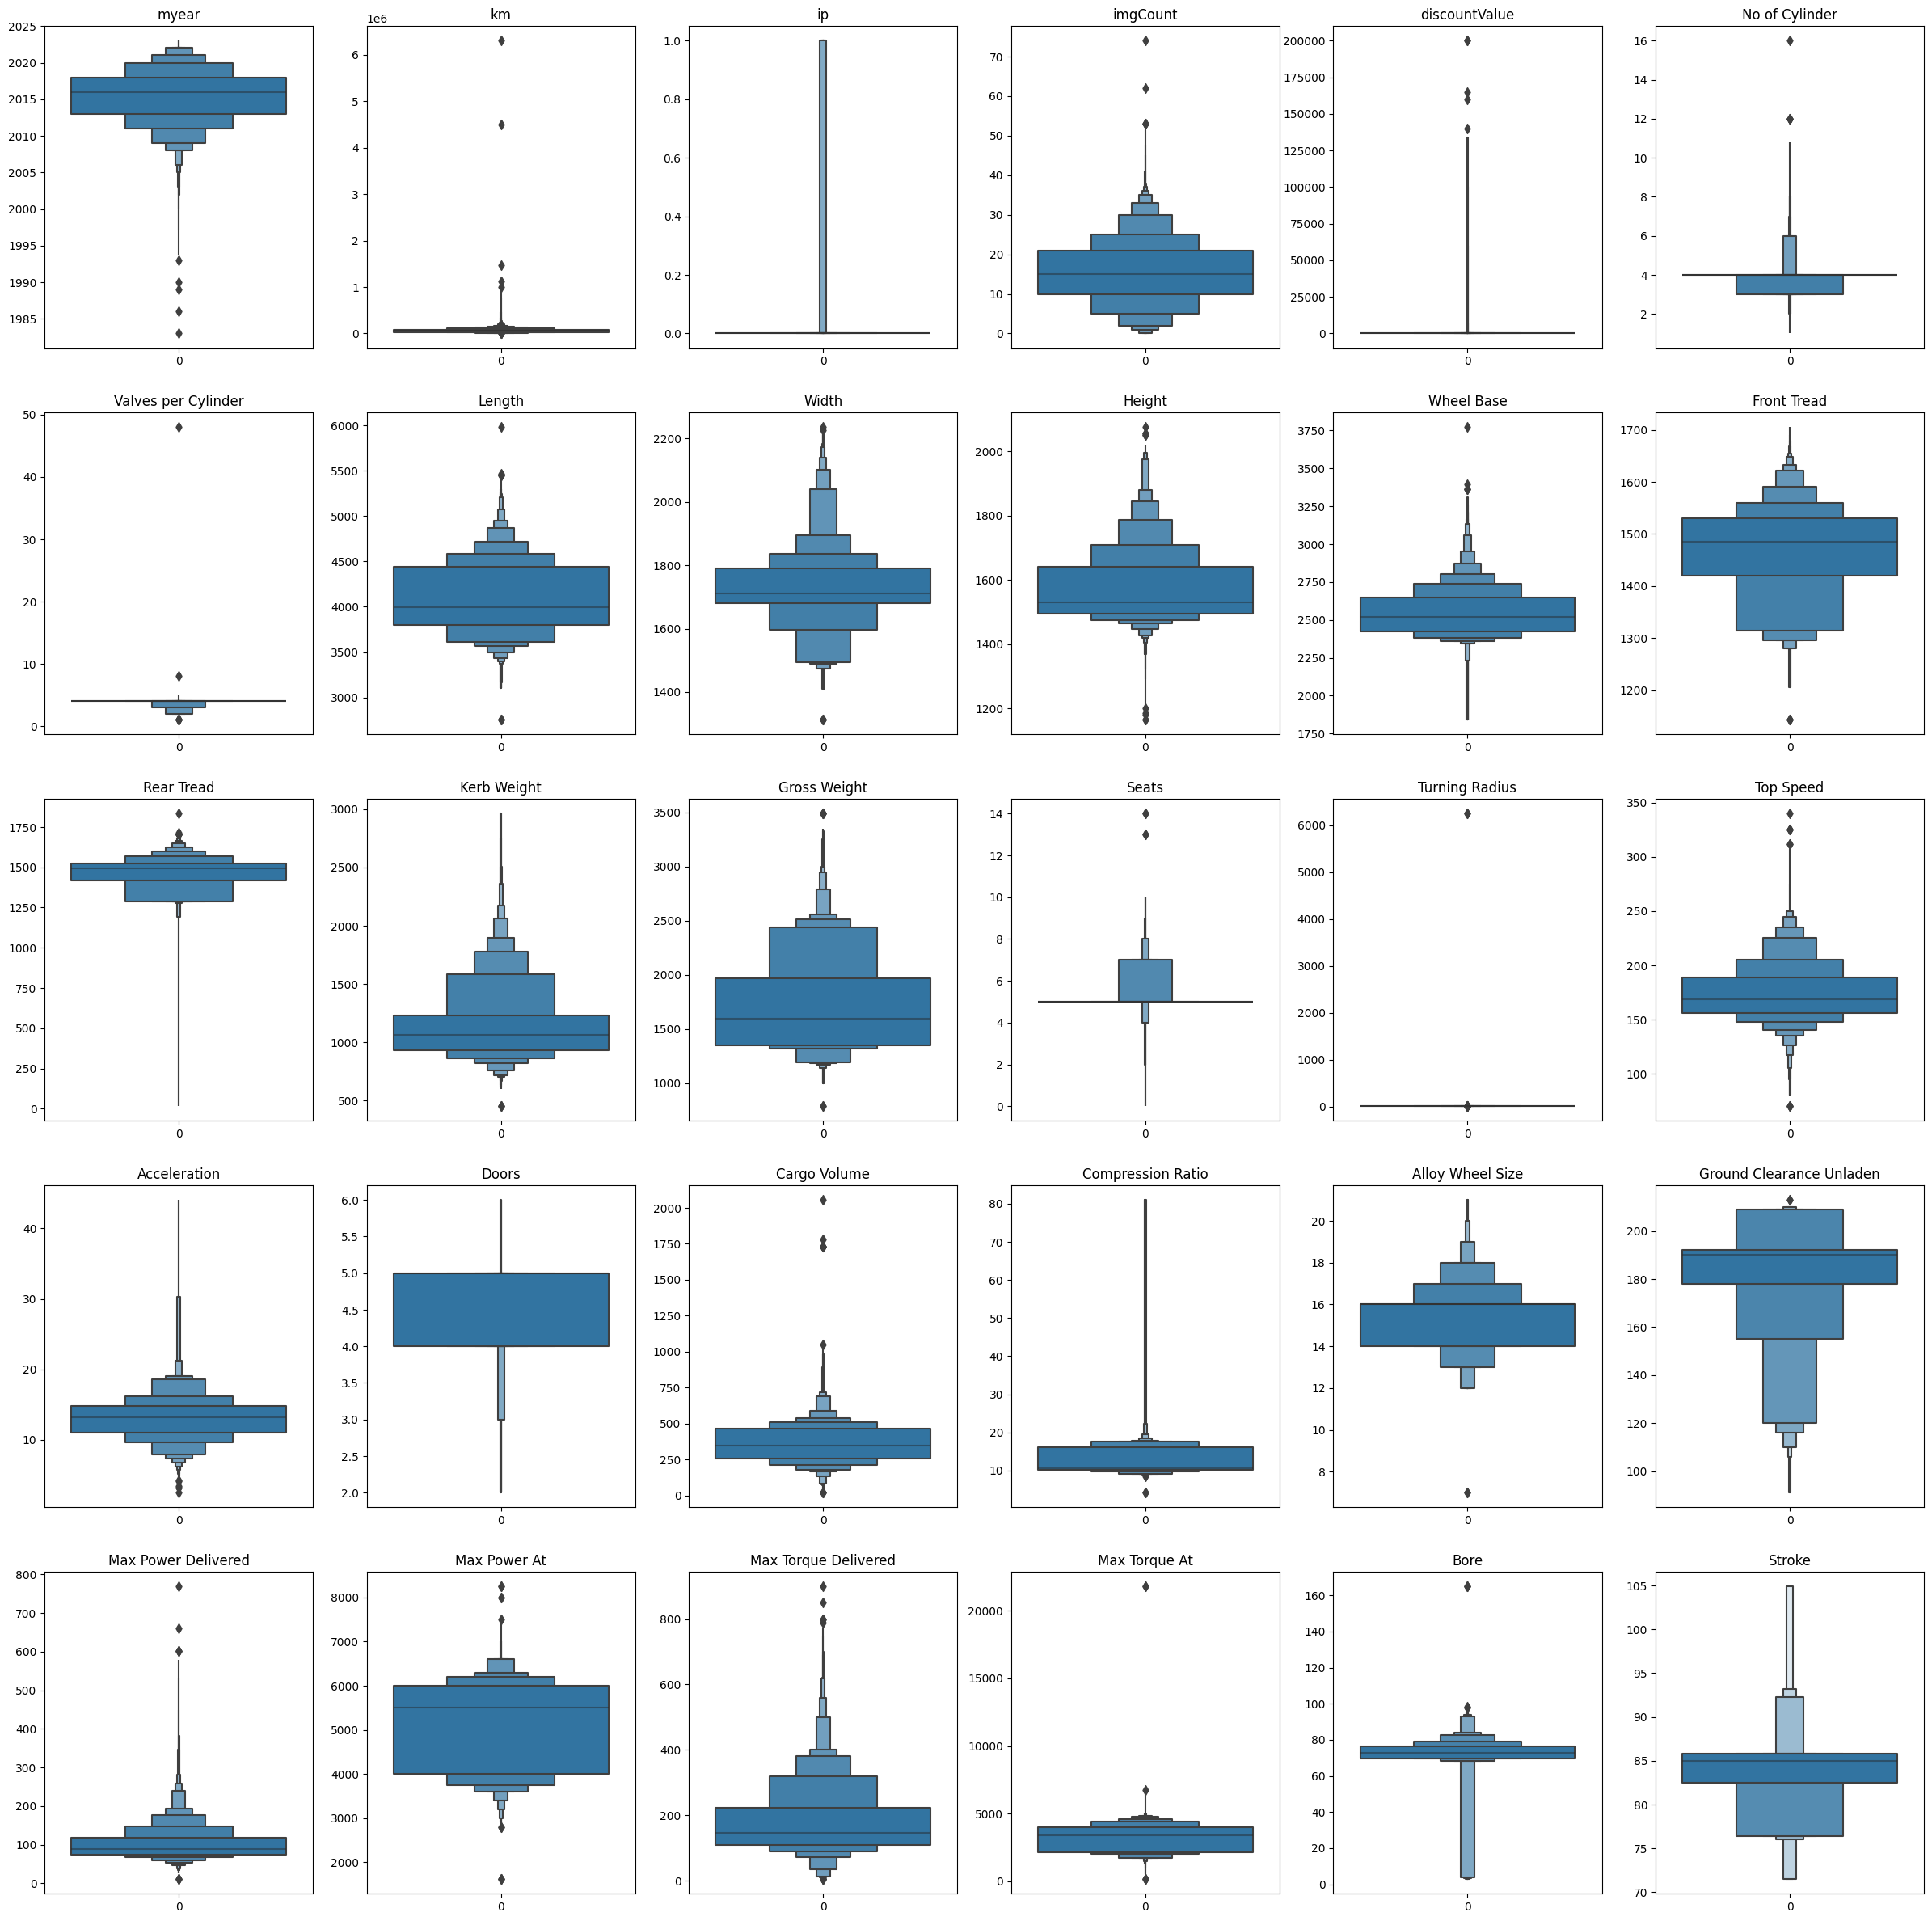

In [264]:
fig, axes = plt.subplots(nrows = 5, ncols = 6)   
axes = axes.flatten()        
fig.set_size_inches(30,30)

for ax, col in zip(axes, numerical_columns):
    print()
    sns.boxenplot(df_train[col], ax = ax)
    ax.set_title(col)

### 5. Next step is to see the density


In [265]:
range(len(df_train))


range(0, 37813)

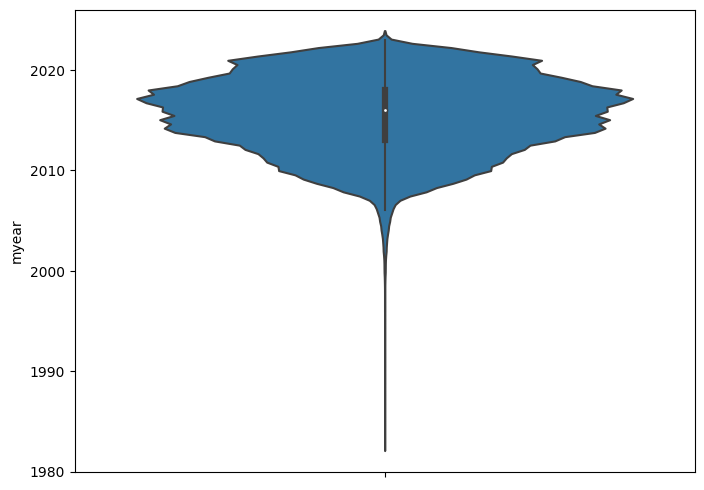

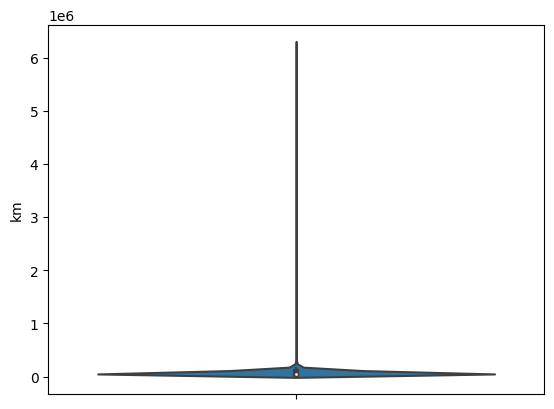

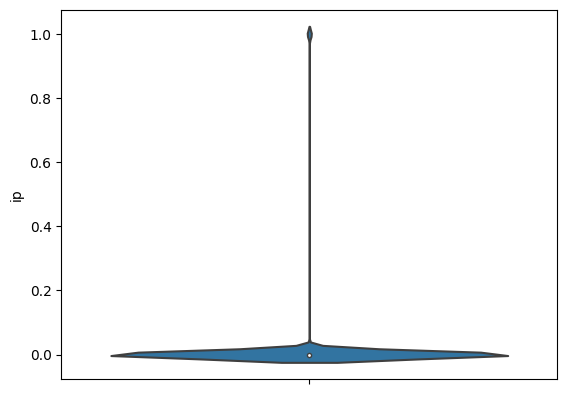

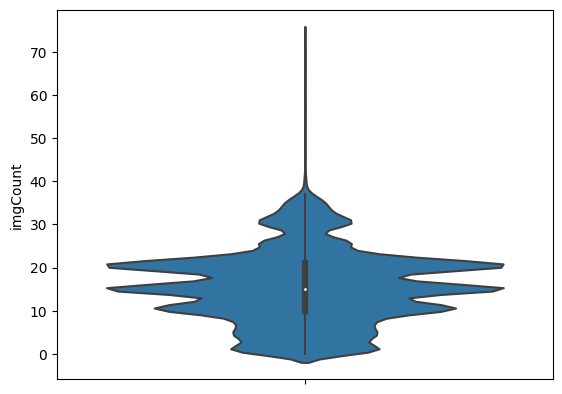

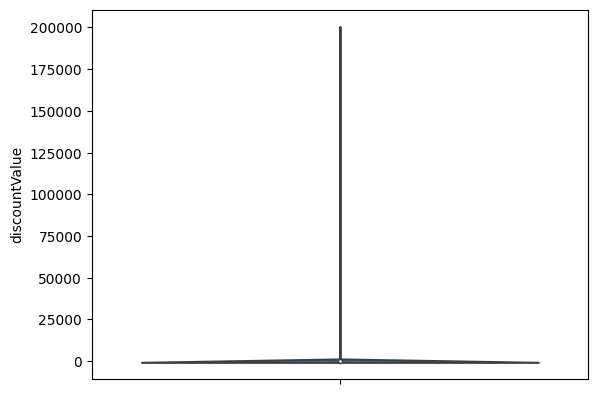

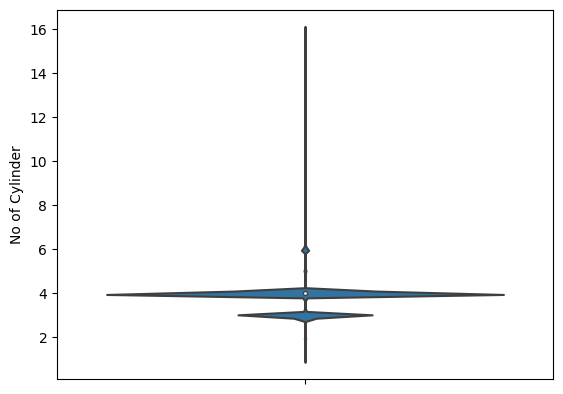

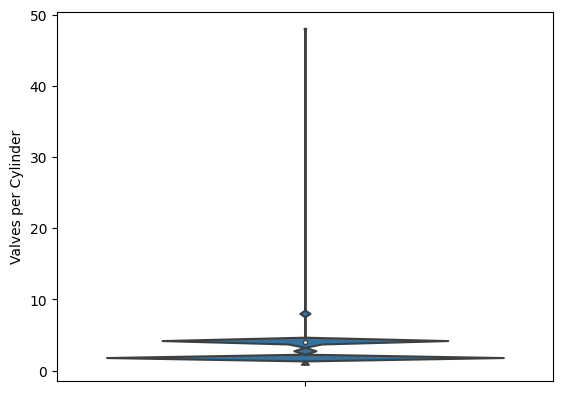

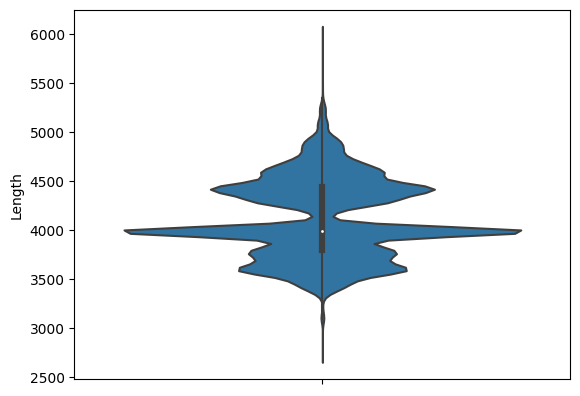

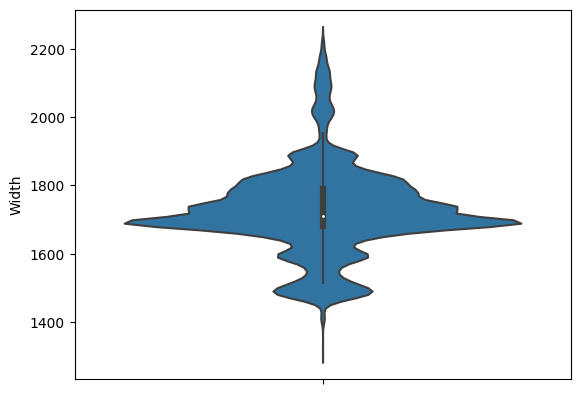

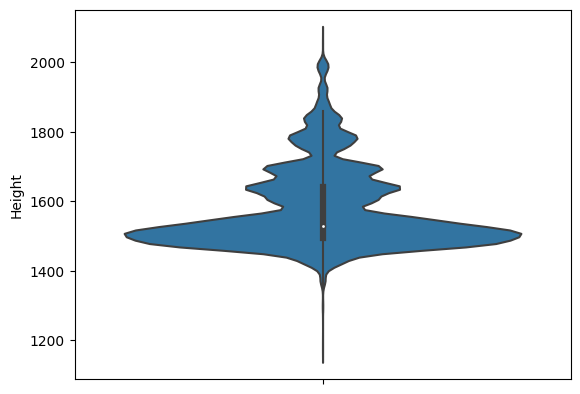

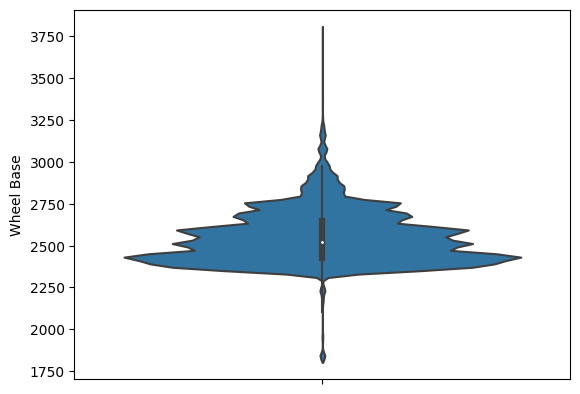

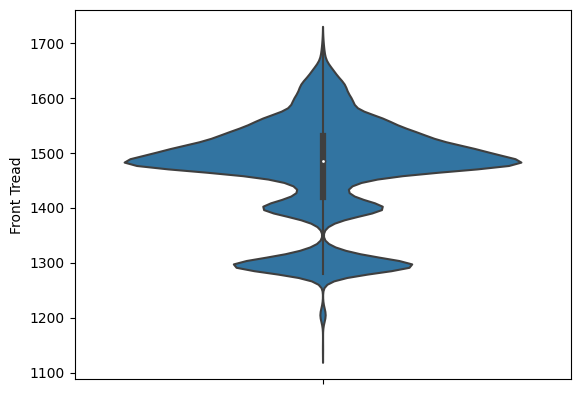

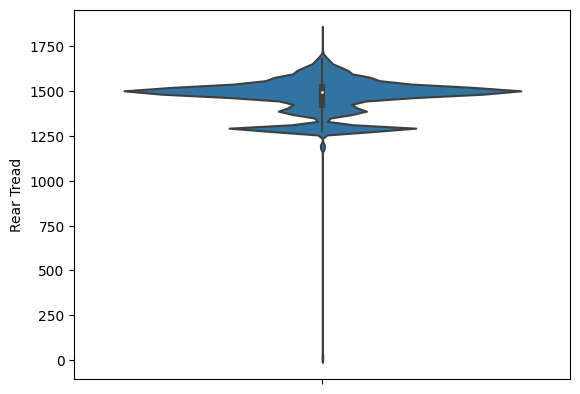

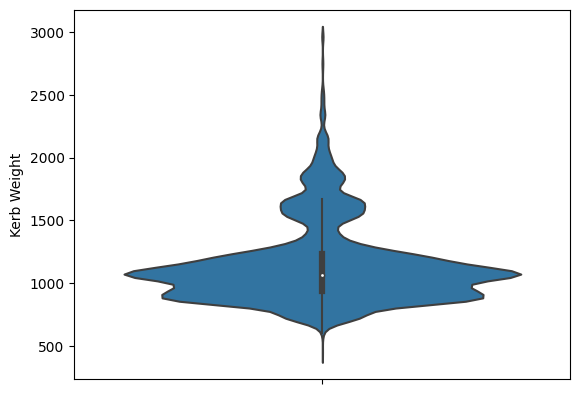

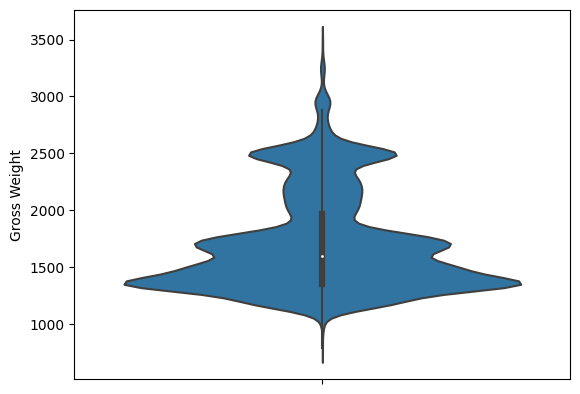

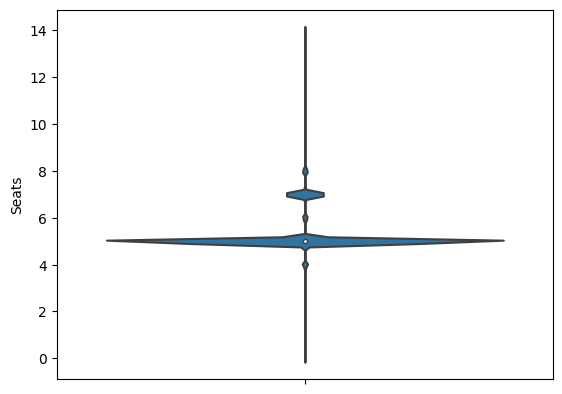

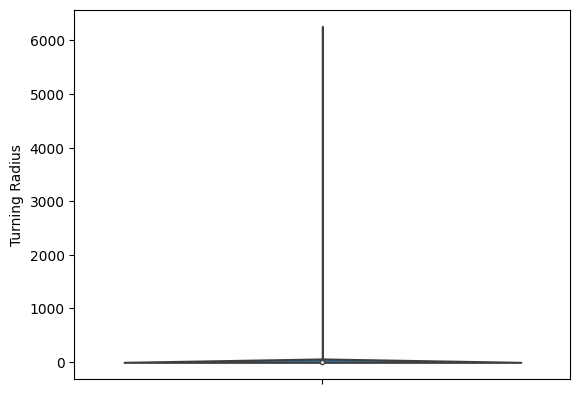

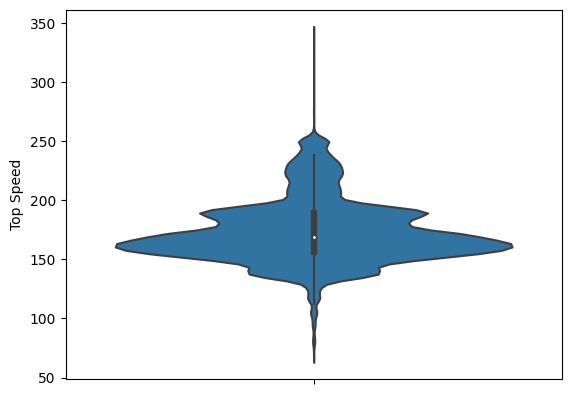

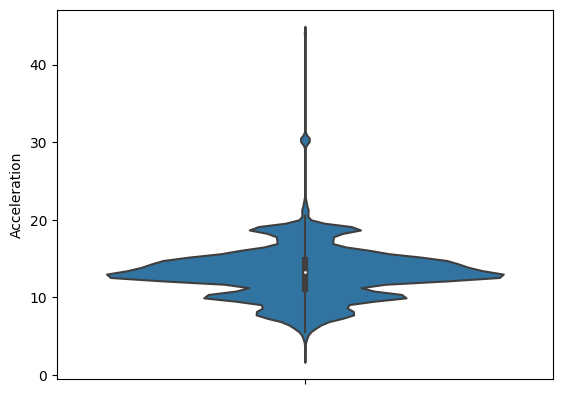

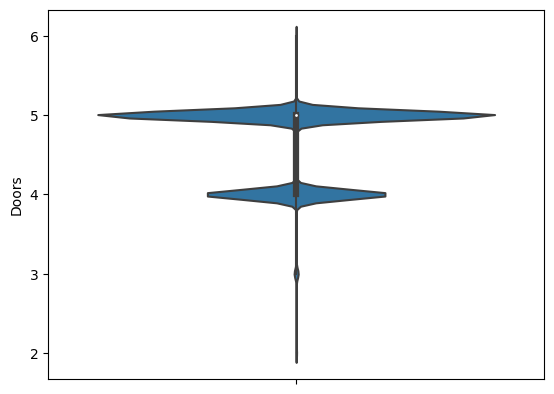

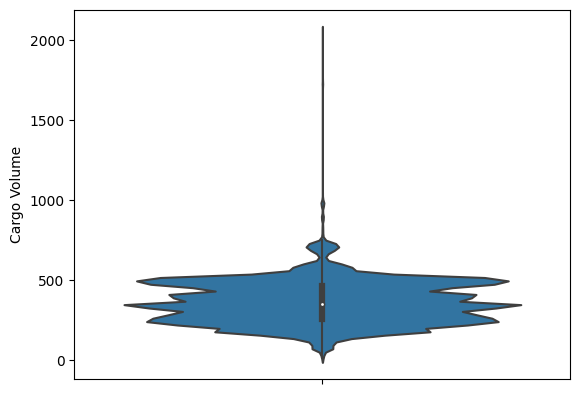

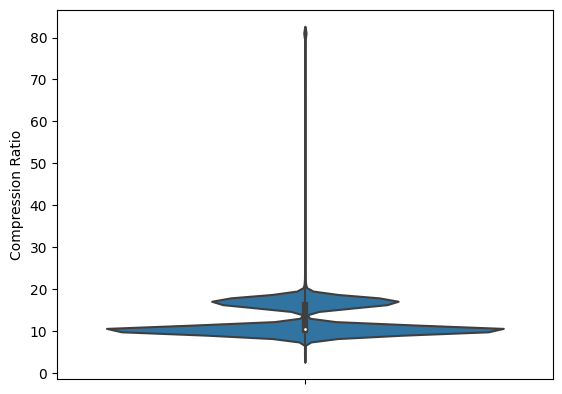

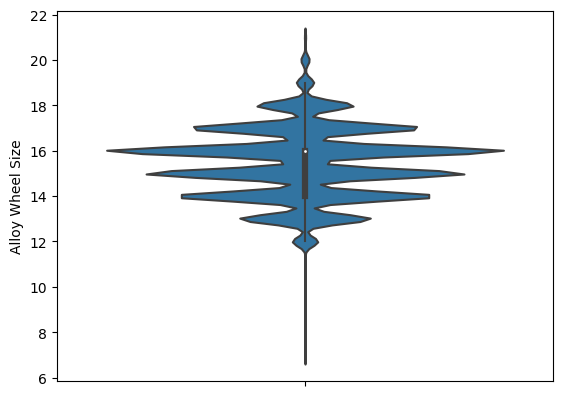

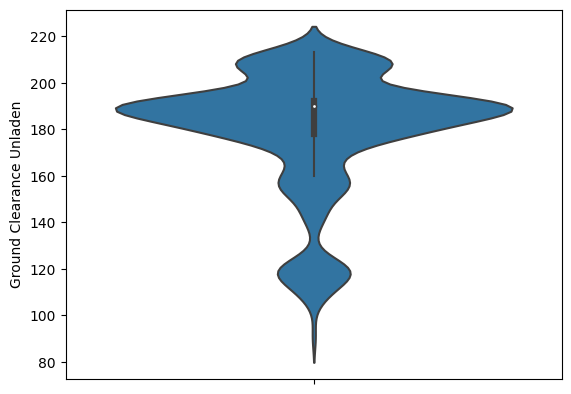

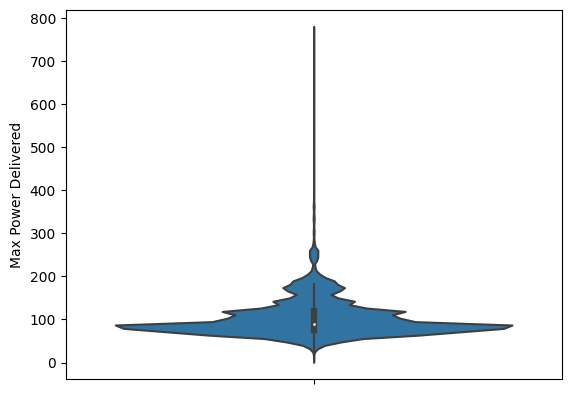

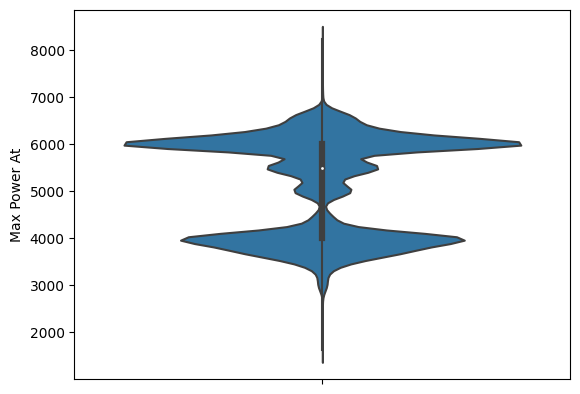

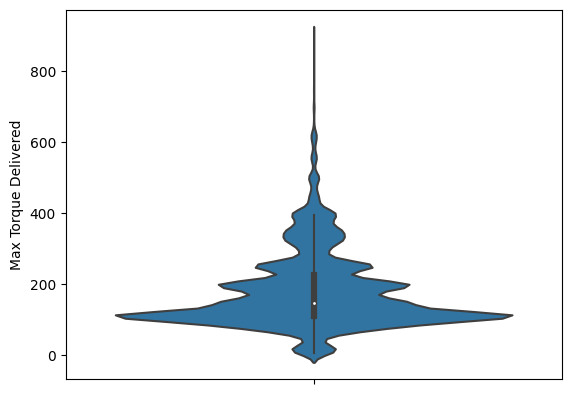

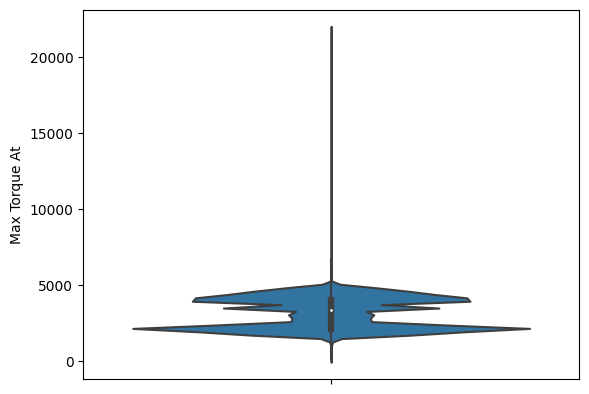

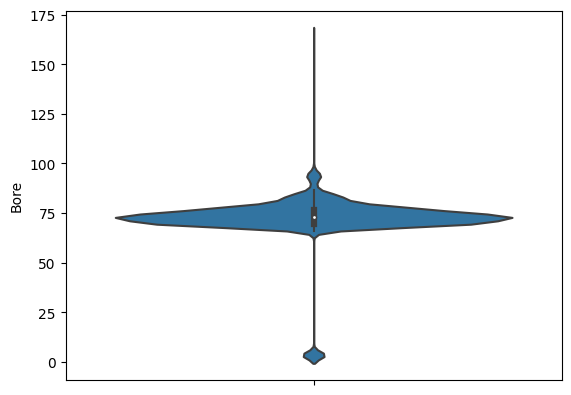

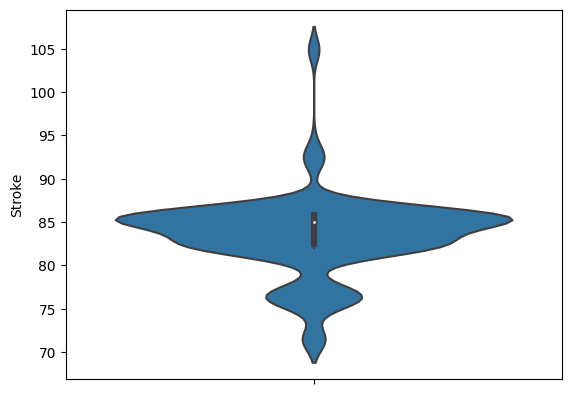

In [266]:
l=[]
for i in range(len(df_train)):
    l.append(i)
# Plot a violin plot for numerical vs categorical
plt.figure(figsize=(8, 6))
for col in numerical_columns:
    sns.violinplot(y=df_train[col])
    plt.show()

### 6. Next step is to see the distribution plot


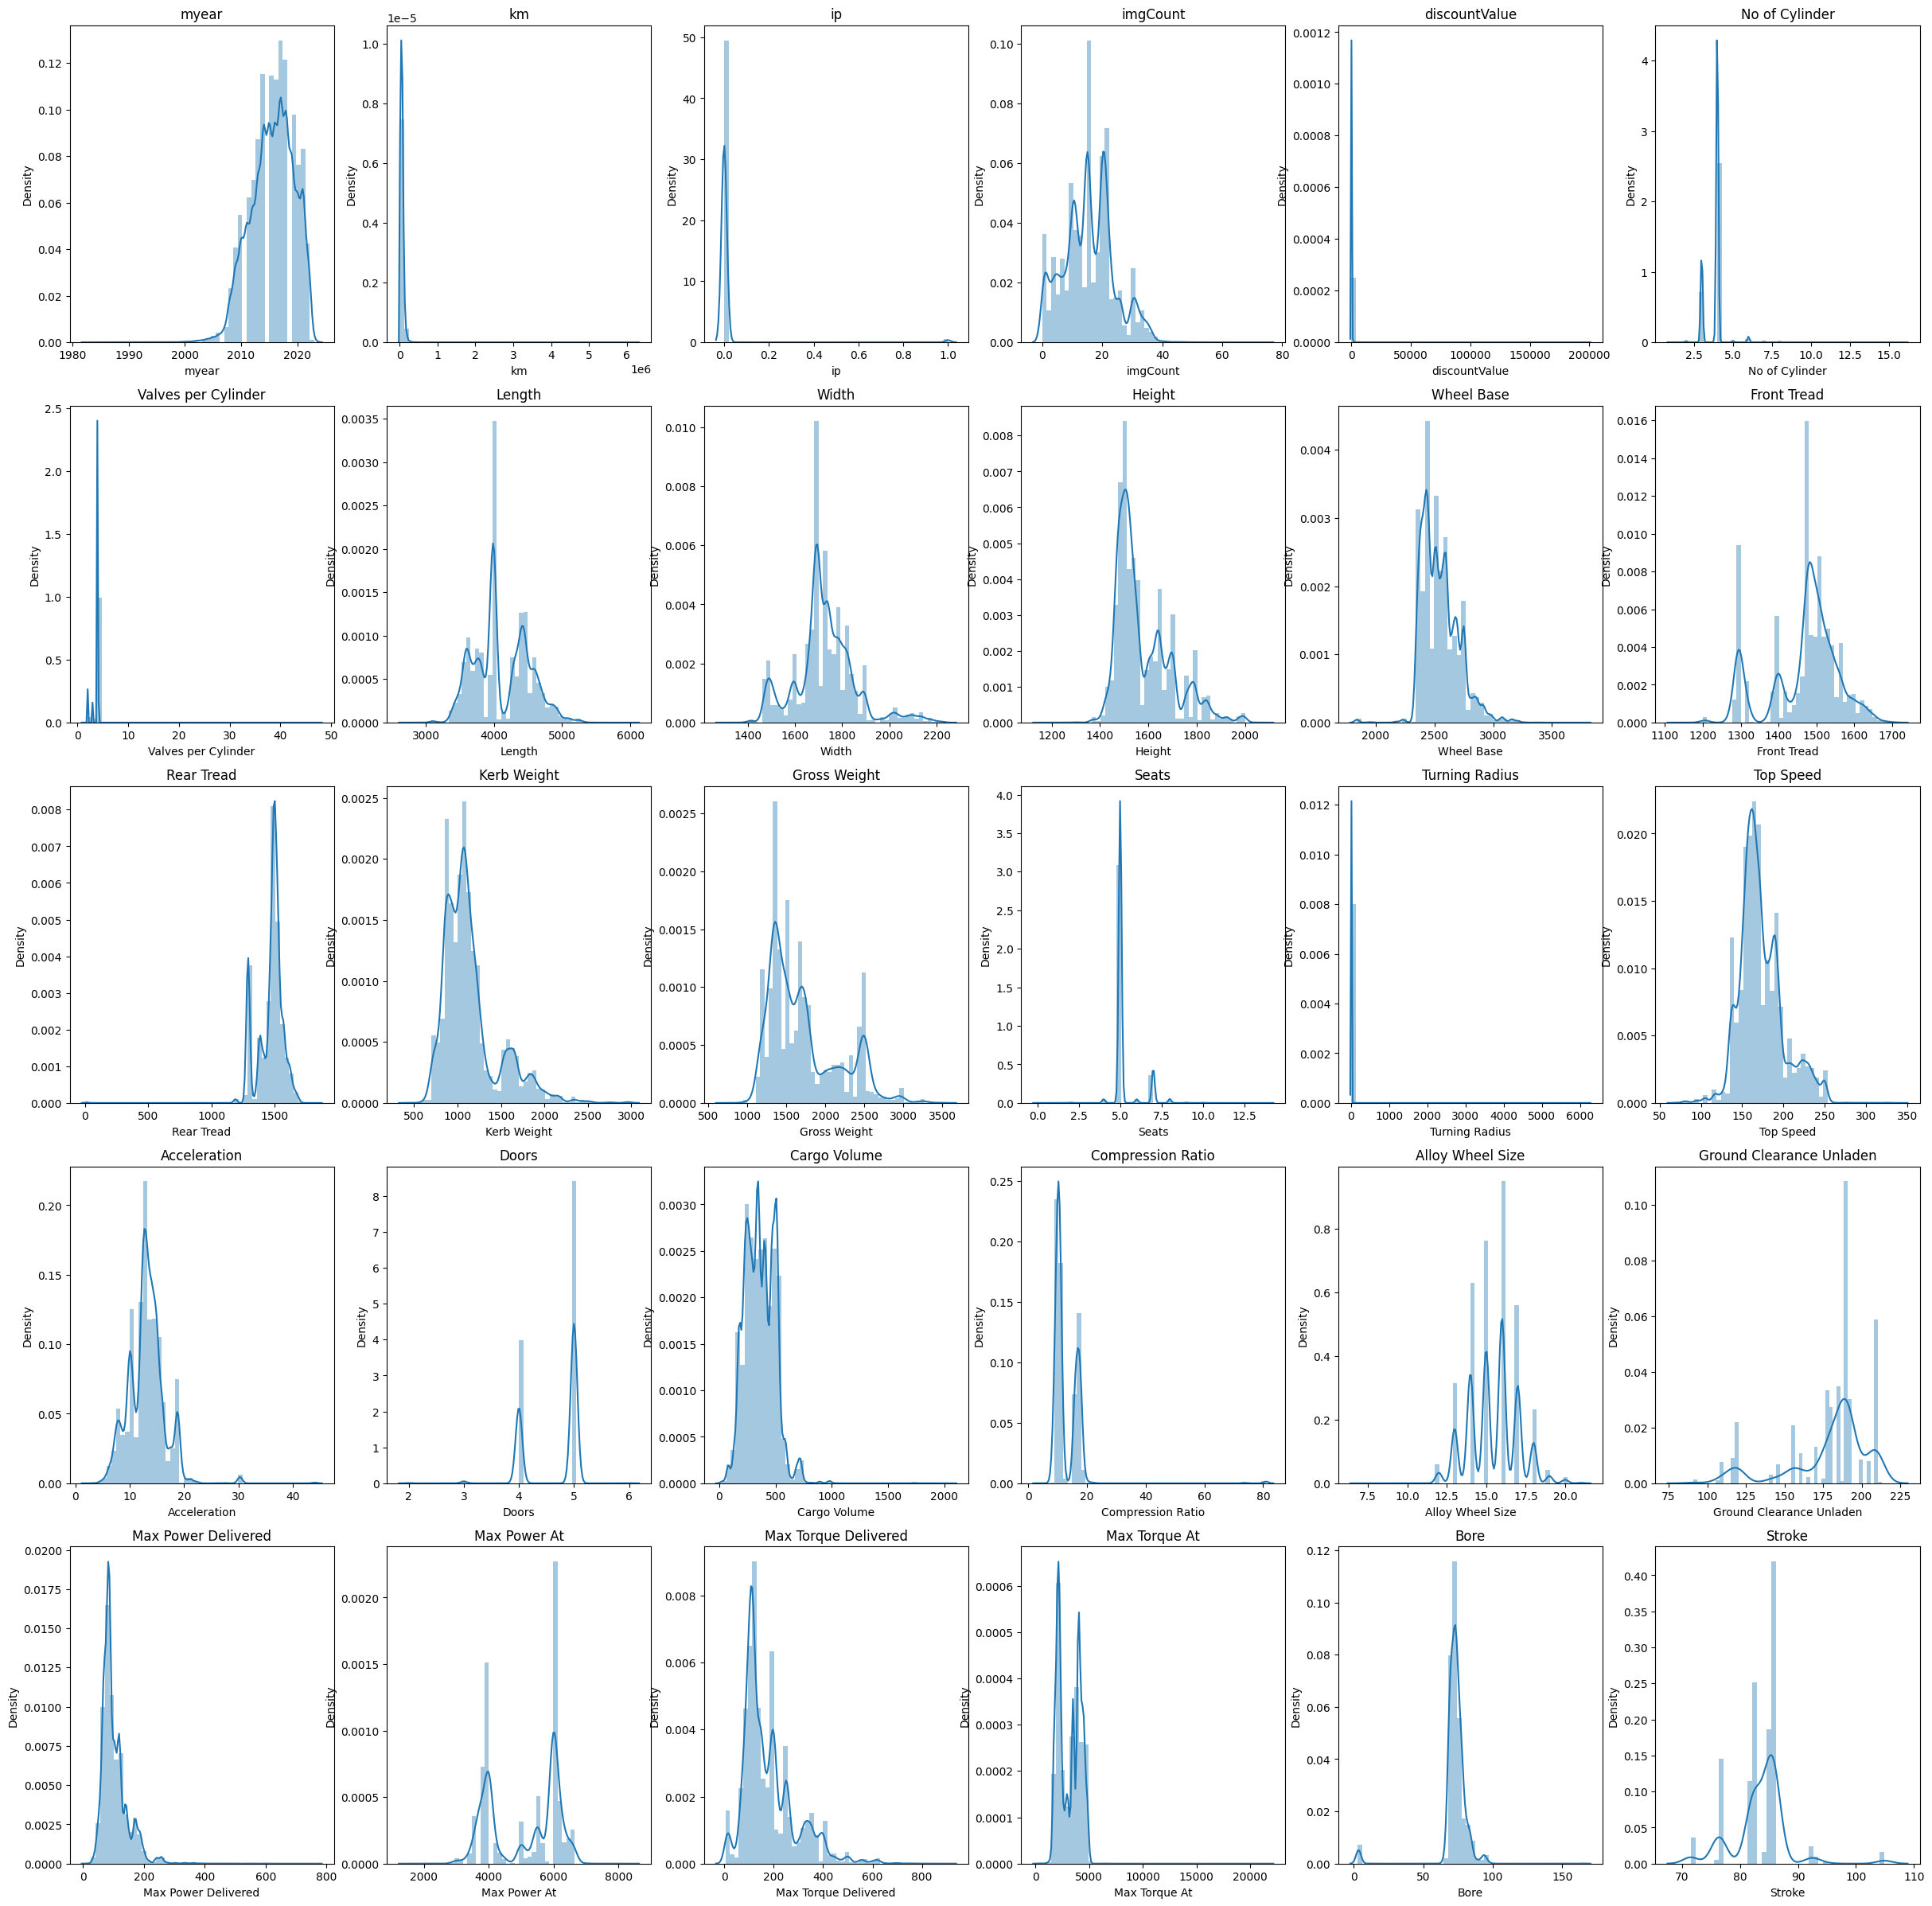

In [267]:
fig, axes = plt.subplots(nrows = 5, ncols = 6)   
axes = axes.flatten()        
fig.set_size_inches(30,30)   

# cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, numerical_columns):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

### 7. To get more clearity we also see the skewness in each of the numerical column


In [268]:
for col in numerical_columns:
    print(f" {df_train[col].skew() } in {col}")

 -0.44137486542608095 in myear
 45.19846281529008 in km
 9.745716426383174 in ip
 0.25509164530133166 in imgCount
 48.92247577128126 in discountValue
 1.6080501441816535 in No of Cylinder
 18.188370068406645 in Valves per Cylinder
 0.24673417650293017 in Length
 0.5873473993330787 in Width
 1.1507771689689943 in Height
 0.7449022236852685 in Wheel Base
 -0.6854479339296744 in Front Tread
 -2.18479023665171 in Rear Tread
 1.4809016098585663 in Kerb Weight
 0.9623508404480289 in Gross Weight
 2.294956234934617 in Seats
 126.39129903316704 in Turning Radius
 0.7592833538562539 in Top Speed
 1.1165484760247721 in Acceleration
 -1.0188372855525862 in Doors
 0.6600774871831472 in Cargo Volume
 7.752506406685187 in Compression Ratio
 0.08353909028641145 in Alloy Wheel Size
 -1.3458989549266756 in Ground Clearance Unladen
 2.2392244743546836 in Max Power Delivered
 -0.2561954154318942 in Max Power At
 1.3600093551825967 in Max Torque Delivered
 0.370794290447104 in Max Torque At
 -4.3748766162

### 8. See the redundant values in a column


In [269]:
df_train[numerical_columns].describe(percentiles = [.25,.5,.75,.8,.95,.99])  


,myear,km,ip,imgCount,discountValue,No of Cylinder,Valves per Cylinder,Length,Width,Height,...,Cargo Volume,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
count,37813.000000,3.781300e+04,37813.000000,37813.000000,37813.000000,37670.000000,37585.000000,37451.000000,37442.000000,37450.000000,...,31081.000000,10012.000000,23352.000000,2152.000000,37582.000000,35566.000000,37582.000000,35837.000000,12636.000000,513.000000
mean,2015.569513,6.240930e+04,0.010208,15.571417,73.281702,3.819405,3.893947,4113.622867,1725.594092,1577.554846,...,363.091857,12.833272,15.450154,179.415892,102.754960,5102.916268,178.772195,3161.846053,72.413974,83.495166
std,3.779089,5.847216e+04,0.100520,8.358068,2805.783272,0.541427,0.478499,399.357437,128.293124,115.152051,...,130.412817,5.259472,1.521884,25.989455,42.784165,1056.280170,106.352882,1025.049102,11.906693,4.654386
min,1983.000000,1.010000e+02,0.000000,0.000000,0.000000,1.000000,1.000000,2752.000000,1312.000000,1165.000000,...,20.000000,4.170000,7.000000,91.000000,10.800000,1620.000000,4.800000,160.000000,2.850000,71.500000
25%,2013.000000,3.173900e+04,0.000000,10.000000,0.000000,4.000000,4.000000,3795.000000,1680.000000,1495.000000,...,256.000000,10.100000,14.000000,178.000000,74.960000,4000.000000,110.000000,2125.000000,69.600000,82.500000
50%,2016.000000,5.672600e+04,0.000000,15.000000,0.000000,4.000000,4.000000,3995.000000,1710.000000,1530.000000,...,350.000000,10.500000,16.000000,190.000000,88.500000,5500.000000,145.000000,3375.000000,73.000000,85.000000
75%,2018.000000,8.331000e+04,0.000000,21.000000,0.000000,4.000000,4.000000,4440.000000,1790.000000,1642.000000,...,465.000000,16.200000,16.000000,192.000000,118.350000,6000.000000,224.000000,4000.000000,76.500000,85.800000
80%,2019.000000,9.000000e+04,0.000000,21.000000,0.000000,4.000000,4.000000,4475.000000,1811.000000,1671.000000,...,480.000000,16.500000,17.000000,192.000000,126.200000,6000.000000,250.000000,4200.000000,77.000000,85.800000
95%,2021.000000,1.323890e+05,0.000000,31.000000,0.000000,4.000000,4.000000,4788.000000,1960.000000,1800.000000,...,540.000000,17.600000,18.000000,209.000000,184.000000,6400.000000,400.000000,4600.000000,84.000000,85.800000
99%,2022.000000,1.917829e+05,1.000000,35.000000,0.000000,6.000000,4.000000,5060.000000,2138.000000,1930.000000,...,720.000000,19.000000,19.000000,210.000000,254.800000,6600.000000,540.000000,4850.000000,94.000000,104.900000


## Modifications



### 1.NULL Values

In [14]:
df_train.select_dtypes(exclude=np.number).isnull().sum()

loc                    5850
body                     19
transmission              0
fuel                      0
threesixty                0
dvn                       0
oem                       0
model                     0
variant                   0
City                      0
utype                     0
carType                   0
top_features              0
comfort_features          0
interior_features         0
exterior_features         0
safety_features           0
Color                   160
Engine Type             868
Valve Configuration    7962
Turbo Charger             0
Super Charger             0
Gear Box                471
Drive Type             4497
Steering Type           808
Front Brake Type        327
Rear Brake Type         326
Tyre Type               257
model_type_new            0
state                     0
exterior_color          123
owner_type                0
Fuel Suppy System      5502
dtype: int64

In [15]:
type(df_train['Fuel Suppy System'][0])

float

In [16]:
7962/37813

0.21056250495861212

In [17]:
categorical_columns=df_train.select_dtypes(exclude=np.number)
numerical_columns=df_train.select_dtypes(include=np.number)

In [18]:
# For categorical columns whichever column has null values greater than 10% remove them
for col in df_train.columns:
    if (df_train[col].isnull().sum()/len(df_train))>=0.1:
        df_train.drop(col,axis=1,inplace=True)
        print(col)

loc
Valve Configuration
Front Tread
Rear Tread
Kerb Weight
Gross Weight
Drive Type
Turning Radius
Top Speed
Acceleration
Cargo Volume
Fuel Suppy System
Compression Ratio
Alloy Wheel Size
Ground Clearance Unladen
Bore
Stroke


In [19]:
categorical_columns=df_train.select_dtypes(exclude=np.number).columns
numerical_columns=df_train.select_dtypes(include=np.number).columns


In [20]:
# For categorical impute them with most cpmmon
for col in categorical_columns:
    imputing_value=df_train[col].value_counts().index[0]
    df_train[col].fillna(imputing_value,inplace=True)
    
  

In [21]:
df_train.select_dtypes(exclude=np.number).isnull().sum()

body                 0
transmission         0
fuel                 0
threesixty           0
dvn                  0
oem                  0
model                0
variant              0
City                 0
utype                0
carType              0
top_features         0
comfort_features     0
interior_features    0
exterior_features    0
safety_features      0
Color                0
Engine Type          0
Turbo Charger        0
Super Charger        0
Gear Box             0
Steering Type        0
Front Brake Type     0
Rear Brake Type      0
Tyre Type            0
model_type_new       0
state                0
exterior_color       0
owner_type           0
dtype: int64

In [22]:
df_train['myear'].median()

2016.0

In [23]:
for col in numerical_columns:
    imputing_value=df_train[col].median()
    df_train[col].fillna(imputing_value,inplace=True)

In [24]:
df_train.select_dtypes(include=np.number).isnull().sum()

myear                   0
km                      0
ip                      0
imgCount                0
discountValue           0
No of Cylinder          0
Valves per Cylinder     0
Length                  0
Width                   0
Height                  0
Wheel Base              0
Seats                   0
Doors                   0
Max Power Delivered     0
Max Power At            0
Max Torque Delivered    0
Max Torque At           0
dtype: int64

In [25]:
categorical_columns=df_train.select_dtypes(exclude=np.number).columns
numerical_columns=df_train.select_dtypes(include=np.number).columns

In [26]:
# for col in df_train.columns:
#     # print(col)
#     if df_train[col].value_counts().values[0]/len(df_train)>0.4:
#         print(df_train[col].value_counts())

### 2.Correlation
Deleting using most correlated

In [27]:
most_correlated=dict()
for col1 in numerical_columns:
    for col2 in numerical_columns:
        if col1!=col2 and abs(df_train[col1].corr(df_train[col2],method='spearman'))>=0.70:
            if (col1 not in most_correlated) and (col2 not in most_correlated):
                most_correlated[col1]=col2

most_correlated

{'Length': 'Width',
 'Width': 'Wheel Base',
 'Wheel Base': 'Max Power Delivered',
 'Max Power Delivered': 'Max Torque Delivered',
 'Max Power At': 'Max Torque At'}

In [28]:
df_train

,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,...,Tyre Type,Doors,model_type_new,state,exterior_color,owner_type,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At
0,2016,hatchback,manual,cng,69162.0,0,15,False,maruti wagon r lxi cng,maruti,...,tubeless,5.0,used,uttar pradesh,silver,first,58.16,6200.0,77.0,3500.0
1,2015,hatchback,manual,cng,45864.0,0,15,False,maruti celerio green vxi,maruti,...,tubeless radial,5.0,used,maharashtra,grey,first,58.20,6000.0,78.0,3500.0
2,2015,sedan,manual,cng,81506.0,0,15,False,honda amaze s plus i-vtec,honda,...,tubeless radial,4.0,used,delhi,silver,second,86.70,6000.0,109.0,4500.0
3,2013,hatchback,manual,cng,115893.0,0,0,False,maruti wagon r lxi cng,maruti,...,tubeless radial,4.0,used,delhi,silver,second,58.20,6200.0,77.0,3500.0
4,2022,muv,manual,cng,18900.0,0,6,False,maruti ertiga vxi cng,maruti,...,tubeless radial,5.0,used,maharashtra,white,first,86.63,5500.0,121.5,4200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,2018,suv,manual,diesel,49882.0,0,15,False,tata nexon 1.5 revotorq xz plus,tata,...,tubeless radial,5.0,used,maharashtra,blue,second,108.50,3750.0,260.0,2125.0
37809,2011,sedan,manual,diesel,82843.0,0,27,False,tata manza aura quadrajet bs iv,tata,...,tubeless radial,4.0,used,maharashtra,white,first,88.80,4000.0,200.0,2375.0
37810,2020,hatchback,manual,diesel,58000.0,0,11,False,tata altroz xz diesel,tata,...,tubeless radial,5.0,used,maharashtra,grey,first,88.77,4000.0,200.0,2125.0
37811,2014,hatchback,manual,diesel,62000.0,0,8,False,tata indica ev2 ls,tata,...,tubeless radial,5.0,used,maharashtra,white,first,69.00,4000.0,140.0,2400.0


In [29]:
df_train.drop(columns=list(most_correlated),axis=1,inplace=True)

In [30]:
df_train

,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,...,Front Brake Type,Rear Brake Type,Tyre Type,Doors,model_type_new,state,exterior_color,owner_type,Max Torque Delivered,Max Torque At
0,2016,hatchback,manual,cng,69162.0,0,15,False,maruti wagon r lxi cng,maruti,...,ventilated disc,drum,tubeless,5.0,used,uttar pradesh,silver,first,77.0,3500.0
1,2015,hatchback,manual,cng,45864.0,0,15,False,maruti celerio green vxi,maruti,...,ventilated disc,drum,tubeless radial,5.0,used,maharashtra,grey,first,78.0,3500.0
2,2015,sedan,manual,cng,81506.0,0,15,False,honda amaze s plus i-vtec,honda,...,disc,drum,tubeless radial,4.0,used,delhi,silver,second,109.0,4500.0
3,2013,hatchback,manual,cng,115893.0,0,0,False,maruti wagon r lxi cng,maruti,...,ventilated disc,drum,tubeless radial,4.0,used,delhi,silver,second,77.0,3500.0
4,2022,muv,manual,cng,18900.0,0,6,False,maruti ertiga vxi cng,maruti,...,disc,drum,tubeless radial,5.0,used,maharashtra,white,first,121.5,4200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,2018,suv,manual,diesel,49882.0,0,15,False,tata nexon 1.5 revotorq xz plus,tata,...,disc,drum,tubeless radial,5.0,used,maharashtra,blue,second,260.0,2125.0
37809,2011,sedan,manual,diesel,82843.0,0,27,False,tata manza aura quadrajet bs iv,tata,...,ventilated disc,drum,tubeless radial,4.0,used,maharashtra,white,first,200.0,2375.0
37810,2020,hatchback,manual,diesel,58000.0,0,11,False,tata altroz xz diesel,tata,...,disc,drum,tubeless radial,5.0,used,maharashtra,grey,first,200.0,2125.0
37811,2014,hatchback,manual,diesel,62000.0,0,8,False,tata indica ev2 ls,tata,...,ventilated disc,drum,tubeless radial,5.0,used,maharashtra,white,first,140.0,2400.0


In [31]:

df['model_type_new'].value_counts()

model_type_new
used    37813
Name: count, dtype: int64

In [32]:
categorical_columns=df_train.select_dtypes(exclude=np.number).columns
numerical_columns=df_train.select_dtypes(include=np.number).columns

In [33]:
categorical_columns

Index(['body', 'transmission', 'fuel', 'threesixty', 'dvn', 'oem', 'model',
       'variant', 'City', 'utype', 'carType', 'top_features',
       'comfort_features', 'interior_features', 'exterior_features',
       'safety_features', 'Color', 'Engine Type', 'Turbo Charger',
       'Super Charger', 'Gear Box', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'model_type_new', 'state',
       'exterior_color', 'owner_type'],
      dtype='object')

In [34]:
numerical_columns

Index(['myear', 'km', 'ip', 'imgCount', 'discountValue', 'No of Cylinder',
       'Valves per Cylinder', 'Height', 'Seats', 'Doors',
       'Max Torque Delivered', 'Max Torque At'],
      dtype='object')

### 3.Deleting Most Redundant

In [35]:
df_train.describe()

,myear,km,ip,imgCount,discountValue,No of Cylinder,Valves per Cylinder,Height,Seats,Doors,Max Torque Delivered,Max Torque At
count,37813.000000,3.781300e+04,37813.000000,37813.000000,37813.000000,37813.000000,37813.000000,37813.000000,37813.000000,37813.000000,37813.000000,37813.000000
mean,2015.569513,6.240930e+04,0.010208,15.571417,73.281702,3.820088,3.894587,1577.098326,5.236612,4.664480,178.565880,3172.984873
std,3.779089,5.847216e+04,0.100520,8.358068,2805.783272,0.540516,0.477125,114.691757,0.722096,0.496371,106.060173,999.032802
min,1983.000000,1.010000e+02,0.000000,0.000000,0.000000,1.000000,1.000000,1165.000000,0.000000,2.000000,4.800000,160.000000
25%,2013.000000,3.173900e+04,0.000000,10.000000,0.000000,4.000000,4.000000,1495.000000,5.000000,4.000000,110.000000,2125.000000
50%,2016.000000,5.672600e+04,0.000000,15.000000,0.000000,4.000000,4.000000,1530.000000,5.000000,5.000000,145.000000,3375.000000
75%,2018.000000,8.331000e+04,0.000000,21.000000,0.000000,4.000000,4.000000,1642.000000,5.000000,5.000000,220.000000,4000.000000
max,2023.000000,6.300000e+06,1.000000,74.000000,200000.000000,16.000000,48.000000,2075.000000,14.000000,6.000000,900.000000,21800.000000


In [36]:
for col in df_train:
    print(col)
    print(df_train[col].value_counts().index[0],"is ",df_train[col].value_counts().values[0]/len(df_train)*100,"%")
    print()

myear
2017 is  10.377383439557825 %

body
hatchback is  39.85930764551874 %

transmission
manual is  76.41287387935365 %

fuel
petrol is  57.580726205273315 %

km
70000.0 is  1.6079126226430065 %

ip
0 is  98.97918705207204 %

imgCount
15 is  11.657366514161795 %

threesixty
False is  80.21844339248406 %

dvn
maruti swift vxi is  0.9176738158834263 %

oem
maruti is  26.313701637003145 %

model
honda city is  5.053817470182213 %

variant
vxi is  3.2607833284849126 %

City
new delhi is  13.140983259725491 %

discountValue
0 is  99.83603522598048 %

utype
dealer is  84.52913019331976 %

carType
partner is  85.9810118213313 %

top_features
['power steering', 'power windows front', 'air conditioner', 'heater', 'adjustable head lights', 'fog lights front', 'anti lock braking system', 'centeral locking', 'cd player'] is  18.443392484066326 %

comfort_features
['power steering', 'power windows front', 'power windows rear', 'remote trunk opener', 'remote fuel lid opener', 'low fuel warning ligh

In [37]:
# Deleting columns which have redundant values greater than >90% iinstances because it will create the biases
for col in df_train:
    percent=df_train[col].value_counts().values[0]/len(df_train)
    if percent>0.90:
        df_train.drop(col,axis=1,inplace=True)
        


In [38]:
df_train

,myear,body,transmission,fuel,km,imgCount,threesixty,dvn,oem,model,...,Seats,Front Brake Type,Rear Brake Type,Tyre Type,Doors,state,exterior_color,owner_type,Max Torque Delivered,Max Torque At
0,2016,hatchback,manual,cng,69162.0,15,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,5.0,ventilated disc,drum,tubeless,5.0,uttar pradesh,silver,first,77.0,3500.0
1,2015,hatchback,manual,cng,45864.0,15,False,maruti celerio green vxi,maruti,maruti celerio,...,5.0,ventilated disc,drum,tubeless radial,5.0,maharashtra,grey,first,78.0,3500.0
2,2015,sedan,manual,cng,81506.0,15,False,honda amaze s plus i-vtec,honda,honda amaze,...,5.0,disc,drum,tubeless radial,4.0,delhi,silver,second,109.0,4500.0
3,2013,hatchback,manual,cng,115893.0,0,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,5.0,ventilated disc,drum,tubeless radial,4.0,delhi,silver,second,77.0,3500.0
4,2022,muv,manual,cng,18900.0,6,False,maruti ertiga vxi cng,maruti,maruti ertiga,...,7.0,disc,drum,tubeless radial,5.0,maharashtra,white,first,121.5,4200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,2018,suv,manual,diesel,49882.0,15,False,tata nexon 1.5 revotorq xz plus,tata,tata nexon,...,5.0,disc,drum,tubeless radial,5.0,maharashtra,blue,second,260.0,2125.0
37809,2011,sedan,manual,diesel,82843.0,27,False,tata manza aura quadrajet bs iv,tata,tata manza,...,5.0,ventilated disc,drum,tubeless radial,4.0,maharashtra,white,first,200.0,2375.0
37810,2020,hatchback,manual,diesel,58000.0,11,False,tata altroz xz diesel,tata,tata altroz,...,5.0,disc,drum,tubeless radial,5.0,maharashtra,grey,first,200.0,2125.0
37811,2014,hatchback,manual,diesel,62000.0,8,False,tata indica ev2 ls,tata,tata indica ev2,...,5.0,ventilated disc,drum,tubeless radial,5.0,maharashtra,white,first,140.0,2400.0


In [39]:
df_train.describe(percentiles=[.05,.1,.25, .5, .75, .8,.9,.95])

,myear,km,imgCount,No of Cylinder,Height,Seats,Doors,Max Torque Delivered,Max Torque At
count,37813.000000,3.781300e+04,37813.000000,37813.000000,37813.000000,37813.000000,37813.000000,37813.000000,37813.000000
mean,2015.569513,6.240930e+04,15.571417,3.820088,1577.098326,5.236612,4.664480,178.565880,3172.984873
std,3.779089,5.847216e+04,8.358068,0.540516,114.691757,0.722096,0.496371,106.060173,999.032802
min,1983.000000,1.010000e+02,0.000000,1.000000,1165.000000,0.000000,2.000000,4.800000,160.000000
5%,2009.000000,1.000000e+04,1.000000,3.000000,1460.000000,5.000000,4.000000,69.000000,1750.000000
10%,2010.000000,1.595760e+04,4.000000,3.000000,1473.000000,5.000000,4.000000,85.000000,2000.000000
25%,2013.000000,3.173900e+04,10.000000,4.000000,1495.000000,5.000000,4.000000,110.000000,2125.000000
50%,2016.000000,5.672600e+04,15.000000,4.000000,1530.000000,5.000000,5.000000,145.000000,3375.000000
75%,2018.000000,8.331000e+04,21.000000,4.000000,1642.000000,5.000000,5.000000,220.000000,4000.000000
80%,2019.000000,9.000000e+04,21.000000,4.000000,1671.000000,5.000000,5.000000,250.000000,4200.000000


### 4. Outliers

In [40]:
df_train

,myear,body,transmission,fuel,km,imgCount,threesixty,dvn,oem,model,...,Seats,Front Brake Type,Rear Brake Type,Tyre Type,Doors,state,exterior_color,owner_type,Max Torque Delivered,Max Torque At
0,2016,hatchback,manual,cng,69162.0,15,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,5.0,ventilated disc,drum,tubeless,5.0,uttar pradesh,silver,first,77.0,3500.0
1,2015,hatchback,manual,cng,45864.0,15,False,maruti celerio green vxi,maruti,maruti celerio,...,5.0,ventilated disc,drum,tubeless radial,5.0,maharashtra,grey,first,78.0,3500.0
2,2015,sedan,manual,cng,81506.0,15,False,honda amaze s plus i-vtec,honda,honda amaze,...,5.0,disc,drum,tubeless radial,4.0,delhi,silver,second,109.0,4500.0
3,2013,hatchback,manual,cng,115893.0,0,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,5.0,ventilated disc,drum,tubeless radial,4.0,delhi,silver,second,77.0,3500.0
4,2022,muv,manual,cng,18900.0,6,False,maruti ertiga vxi cng,maruti,maruti ertiga,...,7.0,disc,drum,tubeless radial,5.0,maharashtra,white,first,121.5,4200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,2018,suv,manual,diesel,49882.0,15,False,tata nexon 1.5 revotorq xz plus,tata,tata nexon,...,5.0,disc,drum,tubeless radial,5.0,maharashtra,blue,second,260.0,2125.0
37809,2011,sedan,manual,diesel,82843.0,27,False,tata manza aura quadrajet bs iv,tata,tata manza,...,5.0,ventilated disc,drum,tubeless radial,4.0,maharashtra,white,first,200.0,2375.0
37810,2020,hatchback,manual,diesel,58000.0,11,False,tata altroz xz diesel,tata,tata altroz,...,5.0,disc,drum,tubeless radial,5.0,maharashtra,grey,first,200.0,2125.0
37811,2014,hatchback,manual,diesel,62000.0,8,False,tata indica ev2 ls,tata,tata indica ev2,...,5.0,ventilated disc,drum,tubeless radial,5.0,maharashtra,white,first,140.0,2400.0


In [41]:
categorical_columns=df_train.select_dtypes(exclude=np.number)
numerical_columns=df_train.select_dtypes(include=np.number)

In [42]:
df_train=pd.concat([df_train,output_col],axis=1)
df_train

,myear,body,transmission,fuel,km,imgCount,threesixty,dvn,oem,model,...,Front Brake Type,Rear Brake Type,Tyre Type,Doors,state,exterior_color,owner_type,Max Torque Delivered,Max Torque At,listed_price
0,2016,hatchback,manual,cng,69162.0,15,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,ventilated disc,drum,tubeless,5.0,uttar pradesh,silver,first,77.0,3500.0,370000.0
1,2015,hatchback,manual,cng,45864.0,15,False,maruti celerio green vxi,maruti,maruti celerio,...,ventilated disc,drum,tubeless radial,5.0,maharashtra,grey,first,78.0,3500.0,365000.0
2,2015,sedan,manual,cng,81506.0,15,False,honda amaze s plus i-vtec,honda,honda amaze,...,disc,drum,tubeless radial,4.0,delhi,silver,second,109.0,4500.0,421000.0
3,2013,hatchback,manual,cng,115893.0,0,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,ventilated disc,drum,tubeless radial,4.0,delhi,silver,second,77.0,3500.0,240000.0
4,2022,muv,manual,cng,18900.0,6,False,maruti ertiga vxi cng,maruti,maruti ertiga,...,disc,drum,tubeless radial,5.0,maharashtra,white,first,121.5,4200.0,1175000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,2018,suv,manual,diesel,49882.0,15,False,tata nexon 1.5 revotorq xz plus,tata,tata nexon,...,disc,drum,tubeless radial,5.0,maharashtra,blue,second,260.0,2125.0,881000.0
37809,2011,sedan,manual,diesel,82843.0,27,False,tata manza aura quadrajet bs iv,tata,tata manza,...,ventilated disc,drum,tubeless radial,4.0,maharashtra,white,first,200.0,2375.0,245000.0
37810,2020,hatchback,manual,diesel,58000.0,11,False,tata altroz xz diesel,tata,tata altroz,...,disc,drum,tubeless radial,5.0,maharashtra,grey,first,200.0,2125.0,735000.0
37811,2014,hatchback,manual,diesel,62000.0,8,False,tata indica ev2 ls,tata,tata indica ev2,...,ventilated disc,drum,tubeless radial,5.0,maharashtra,white,first,140.0,2400.0,225000.0


In [43]:



for col in numerical_columns:
    q1=df_train[col].quantile(0.25)
    q3=df_train[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    h=q3+1.5*iqr
    print("For column : ",col)
    print("[",l,",",h,"]")
    value=df_train[col].mode().values[0]
    df_train[col] = np.where((df_train[col] < l) | (df_train[col] > h), value, df_train[col])
 


For column :  myear
[ 2005.5 , 2025.5 ]
For column :  km
[ -45617.5 , 160666.5 ]
For column :  imgCount
[ -6.5 , 37.5 ]
For column :  No of Cylinder
[ 4.0 , 4.0 ]
For column :  Height
[ 1274.5 , 1862.5 ]
For column :  Seats
[ 5.0 , 5.0 ]
For column :  Doors
[ 2.5 , 6.5 ]
For column :  Max Torque Delivered
[ -55.0 , 385.0 ]
For column :  Max Torque At
[ -687.5 , 6812.5 ]


In [44]:
df_train

,myear,body,transmission,fuel,km,imgCount,threesixty,dvn,oem,model,...,Front Brake Type,Rear Brake Type,Tyre Type,Doors,state,exterior_color,owner_type,Max Torque Delivered,Max Torque At,listed_price
0,2016,hatchback,manual,cng,69162.0,15,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,ventilated disc,drum,tubeless,5.0,uttar pradesh,silver,first,77.0,3500.0,370000.0
1,2015,hatchback,manual,cng,45864.0,15,False,maruti celerio green vxi,maruti,maruti celerio,...,ventilated disc,drum,tubeless radial,5.0,maharashtra,grey,first,78.0,3500.0,365000.0
2,2015,sedan,manual,cng,81506.0,15,False,honda amaze s plus i-vtec,honda,honda amaze,...,disc,drum,tubeless radial,4.0,delhi,silver,second,109.0,4500.0,421000.0
3,2013,hatchback,manual,cng,115893.0,0,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,ventilated disc,drum,tubeless radial,4.0,delhi,silver,second,77.0,3500.0,240000.0
4,2022,muv,manual,cng,18900.0,6,False,maruti ertiga vxi cng,maruti,maruti ertiga,...,disc,drum,tubeless radial,5.0,maharashtra,white,first,121.5,4200.0,1175000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,2018,suv,manual,diesel,49882.0,15,False,tata nexon 1.5 revotorq xz plus,tata,tata nexon,...,disc,drum,tubeless radial,5.0,maharashtra,blue,second,260.0,2125.0,881000.0
37809,2011,sedan,manual,diesel,82843.0,27,False,tata manza aura quadrajet bs iv,tata,tata manza,...,ventilated disc,drum,tubeless radial,4.0,maharashtra,white,first,200.0,2375.0,245000.0
37810,2020,hatchback,manual,diesel,58000.0,11,False,tata altroz xz diesel,tata,tata altroz,...,disc,drum,tubeless radial,5.0,maharashtra,grey,first,200.0,2125.0,735000.0
37811,2014,hatchback,manual,diesel,62000.0,8,False,tata indica ev2 ls,tata,tata indica ev2,...,ventilated disc,drum,tubeless radial,5.0,maharashtra,white,first,140.0,2400.0,225000.0


#### Winsorization

In [45]:
# Define the percentage for Winsorization

for col in numerical_columns:
    lower_bound=df_train[col].quantile(0.1)
    upper_bound=df_train[col].quantile(0.97)

    
    df_train[col] = np.where((df_train[col] < lower_bound) ,lower_bound, df_train[col])
    df_train[col] = np.where((df_train[col] > upper_bound) ,upper_bound, df_train[col])
    
 


In [46]:
df_train.describe(percentiles=[.05,.1,.25, .5, .75, .8,.9,.95])

,myear,km,imgCount,No of Cylinder,Height,Seats,Doors,Max Torque Delivered,Max Torque At,listed_price
count,37813.000000,37813.000000,37813.000000,37813.0,37813.000000,37813.0,37813.000000,37813.000000,37813.000000,3.781300e+04
mean,2015.749319,59302.938233,15.688784,4.0,1569.267553,5.0,4.674980,167.471665,3193.595774,7.999868e+05
std,3.458993,32287.514101,7.772953,0.0,96.601090,0.0,0.468389,75.156870,955.836540,3.043045e+06
min,2010.000000,15957.600000,4.000000,4.0,1473.000000,5.0,4.000000,85.000000,2000.000000,1.196300e+04
5%,2010.000000,15957.600000,4.000000,4.0,1473.000000,5.0,4.000000,85.000000,2000.000000,1.450000e+05
10%,2010.000000,15958.080000,4.000000,4.0,1473.000000,5.0,4.000000,85.000000,2000.000000,1.979808e+05
25%,2013.000000,31739.000000,10.000000,4.0,1495.000000,5.0,4.000000,110.000000,2125.000000,3.200000e+05
50%,2016.000000,56726.000000,15.000000,4.0,1530.000000,5.0,5.000000,145.000000,3375.000000,5.250000e+05
75%,2018.000000,80000.000000,21.000000,4.0,1640.000000,5.0,5.000000,200.000000,4000.000000,8.552720e+05
80%,2019.000000,88000.000000,21.000000,4.0,1650.000000,5.0,5.000000,219.700000,4200.000000,1.000000e+06


In [47]:
output_col=df_train['listed_price']
df_train.drop('listed_price',axis=1,inplace=True)


In [48]:
categorical_columns=df_train.select_dtypes(exclude=np.number).columns
numerical_columns=df_train.select_dtypes(include=np.number).columns

In [49]:
numerical_columns

Index(['myear', 'km', 'imgCount', 'No of Cylinder', 'Height', 'Seats', 'Doors',
       'Max Torque Delivered', 'Max Torque At'],
      dtype='object')

In [50]:
categorical_columns

Index(['body', 'transmission', 'fuel', 'threesixty', 'dvn', 'oem', 'model',
       'variant', 'City', 'utype', 'carType', 'top_features',
       'comfort_features', 'interior_features', 'exterior_features',
       'safety_features', 'Color', 'Engine Type', 'Turbo Charger',
       'Super Charger', 'Gear Box', 'Front Brake Type', 'Rear Brake Type',
       'Tyre Type', 'state', 'exterior_color', 'owner_type'],
      dtype='object')

### 5. Distribution plot and skewness

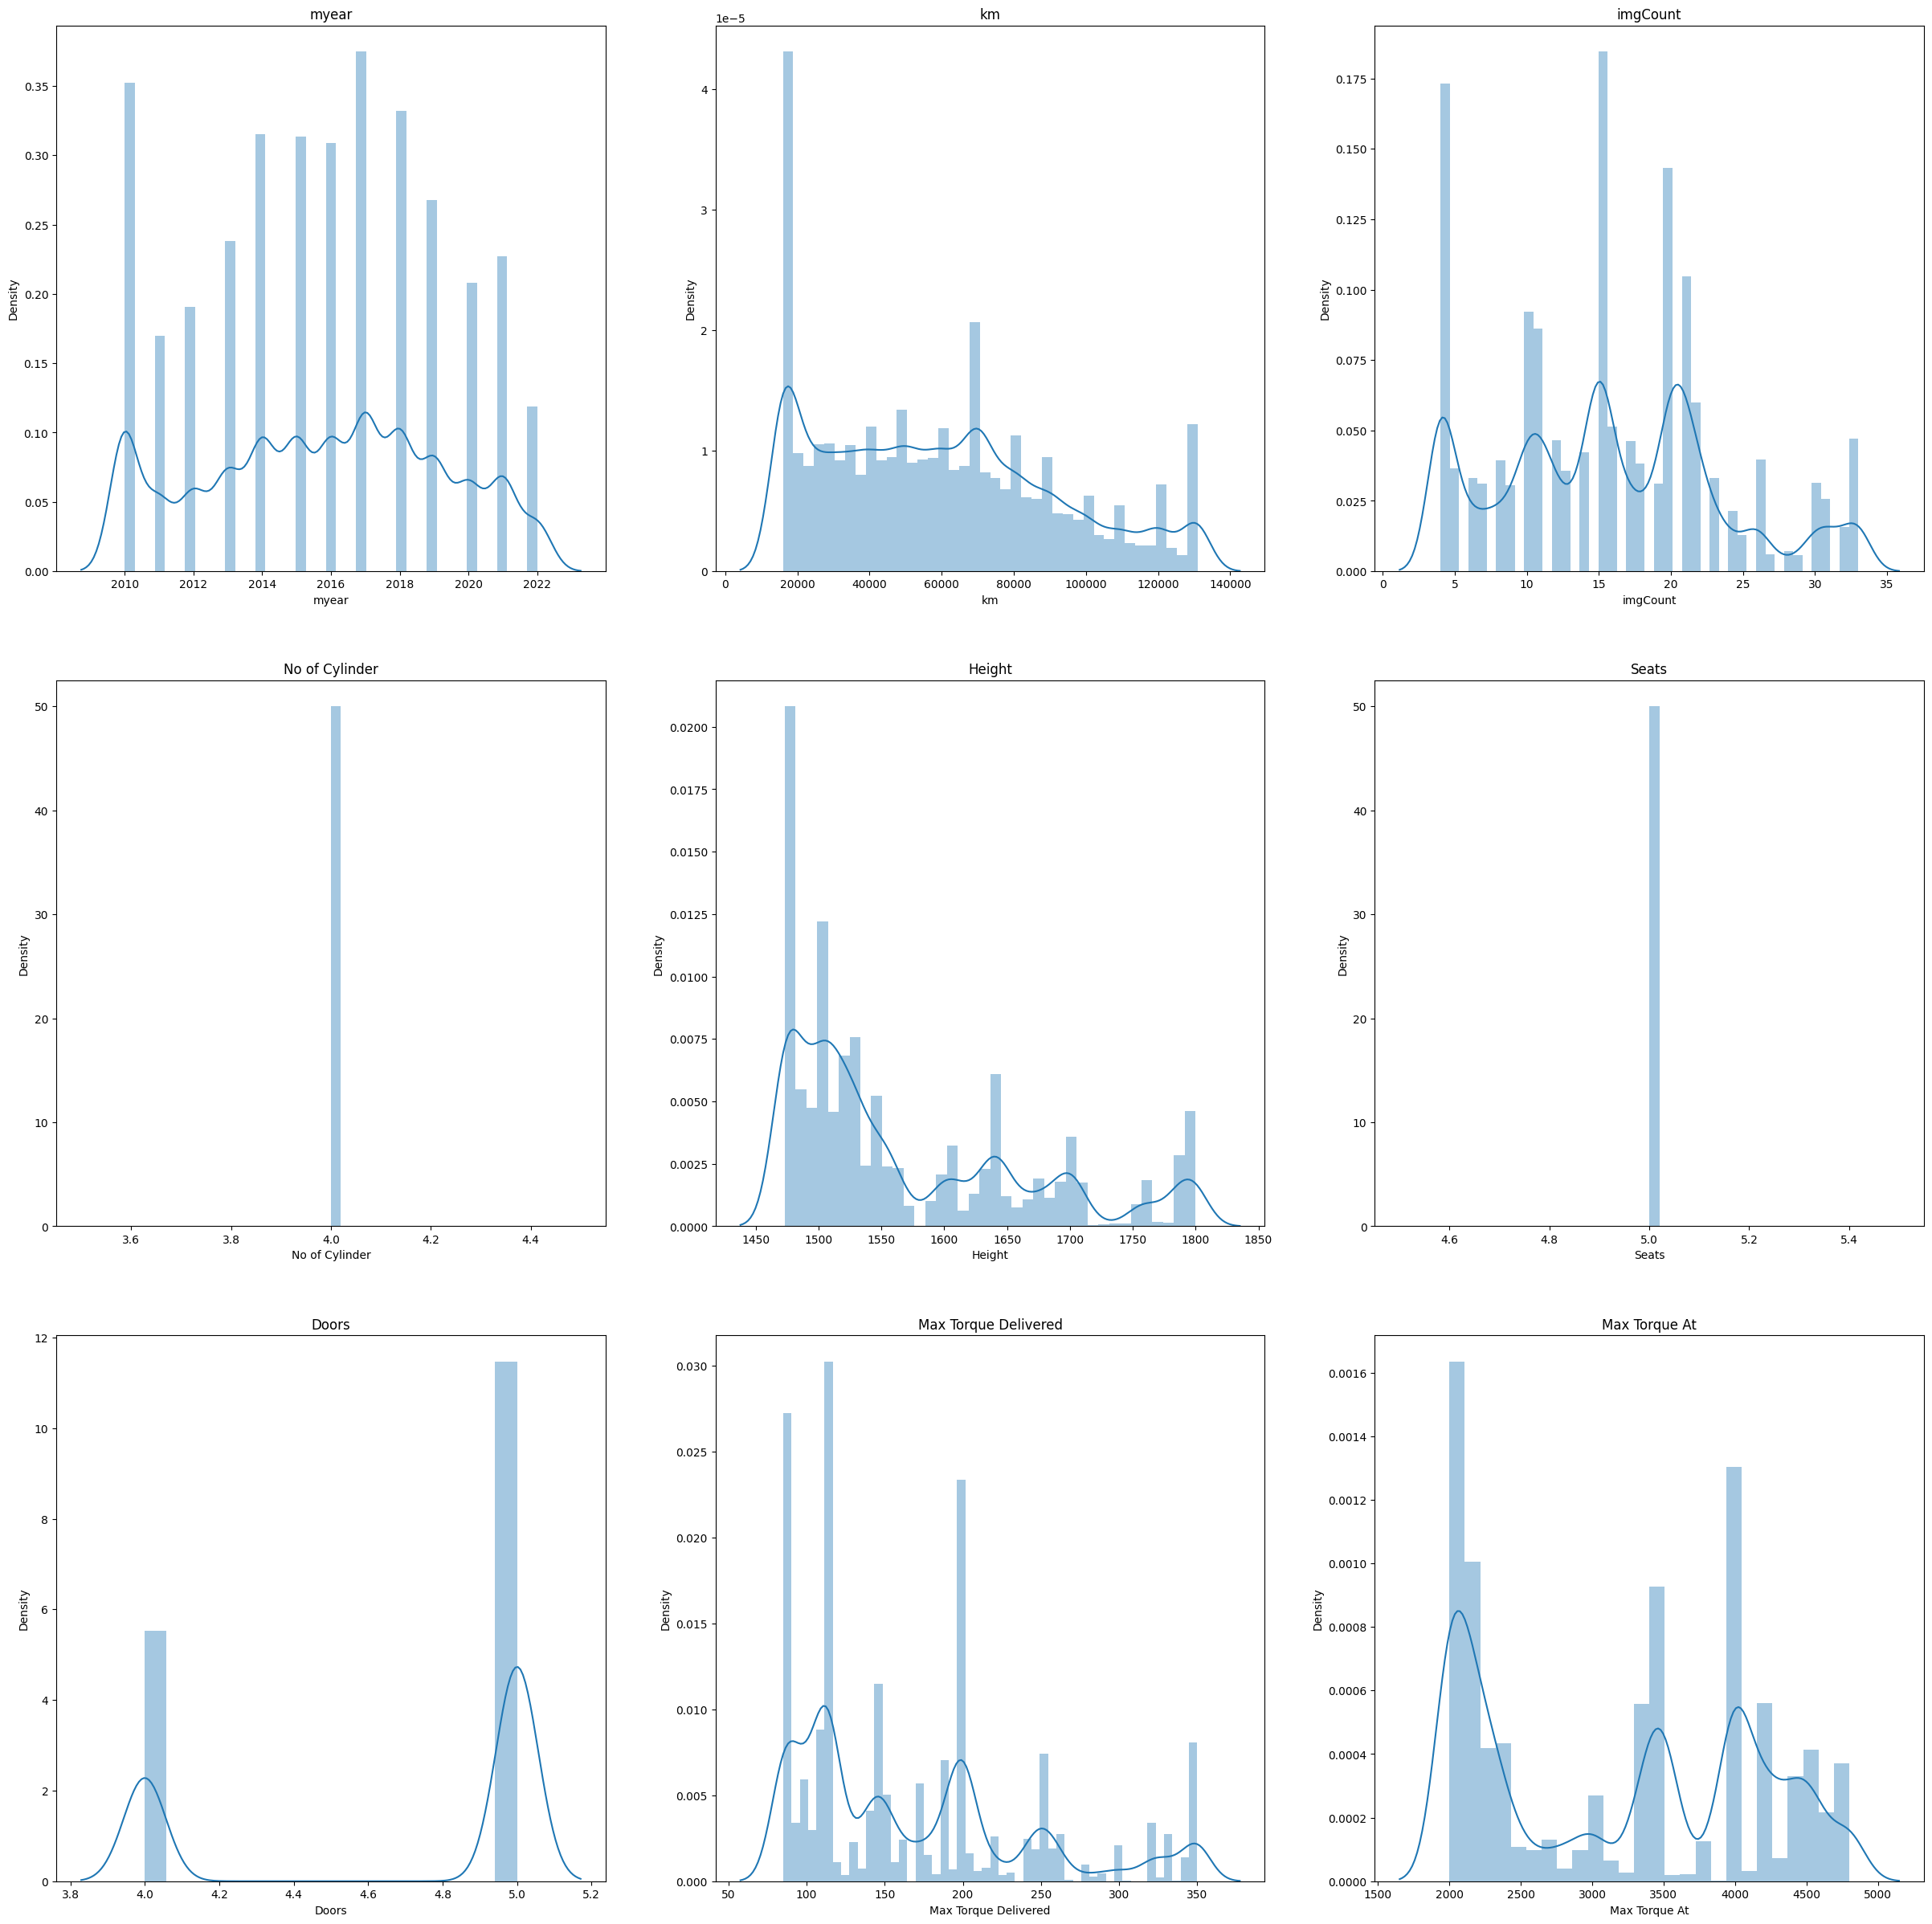

In [51]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)   
axes = axes.flatten()        
fig.set_size_inches(30,30)   

# cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, numerical_columns):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

In [52]:
for col in numerical_columns:
    print("Skewness in column ",col," is ",df_train[col].skew()) 

Skewness in column  myear  is  -0.07240334960617949
Skewness in column  km  is  0.46151786095870395
Skewness in column  imgCount  is  0.31014041624880795
Skewness in column  No of Cylinder  is  0.0
Skewness in column  Height  is  0.995392073128412
Skewness in column  Seats  is  0.0
Skewness in column  Doors  is  -0.7471946253926289
Skewness in column  Max Torque Delivered  is  0.9331727558316686
Skewness in column  Max Torque At  is  0.06489000687468365


In [53]:
df_train.describe()

,myear,km,imgCount,No of Cylinder,Height,Seats,Doors,Max Torque Delivered,Max Torque At
count,37813.000000,37813.000000,37813.000000,37813.0,37813.000000,37813.0,37813.000000,37813.000000,37813.000000
mean,2015.749319,59302.938233,15.688784,4.0,1569.267553,5.0,4.674980,167.471665,3193.595774
std,3.458993,32287.514101,7.772953,0.0,96.601090,0.0,0.468389,75.156870,955.836540
min,2010.000000,15957.600000,4.000000,4.0,1473.000000,5.0,4.000000,85.000000,2000.000000
25%,2013.000000,31739.000000,10.000000,4.0,1495.000000,5.0,4.000000,110.000000,2125.000000
50%,2016.000000,56726.000000,15.000000,4.0,1530.000000,5.0,5.000000,145.000000,3375.000000
75%,2018.000000,80000.000000,21.000000,4.0,1640.000000,5.0,5.000000,200.000000,4000.000000
max,2022.000000,130916.920000,33.000000,4.0,1800.000000,5.0,5.000000,350.000000,4800.000000


### 6. Scaling

#### 6(a) StandardScaler 

In [54]:
sc=StandardScaler()
for col in numerical_columns:
    df_train[col]=sc.fit_transform(df_train[[col]])

In [55]:
df_train.describe()

,myear,km,imgCount,No of Cylinder,Height,Seats,Doors,Max Torque Delivered,Max Torque At
count,3.781300e+04,3.781300e+04,3.781300e+04,37813.0,3.781300e+04,37813.0,3.781300e+04,3.781300e+04,3.781300e+04
mean,-2.282877e-14,-6.013109e-17,7.817041e-17,0.0,-3.878455e-16,0.0,-1.172556e-16,1.473212e-16,3.457537e-17
std,1.000013e+00,1.000013e+00,1.000013e+00,0.0,1.000013e+00,0.0,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.662158e+00,-1.342498e+00,-1.503796e+00,0.0,-9.965605e-01,0.0,-1.441086e+00,-1.097342e+00,-1.248761e+00
25%,-7.948426e-01,-8.537140e-01,-7.318788e-01,0.0,-7.688167e-01,0.0,-1.441086e+00,-7.646996e-01,-1.117984e+00
50%,7.247319e-02,-7.981328e-02,-8.861412e-02,0.0,-4.064972e-01,0.0,6.939211e-01,-2.990008e-01,1.897883e-01
75%,6.506837e-01,6.410322e-01,6.833035e-01,0.0,7.322214e-01,0.0,6.939211e-01,4.328116e-01,8.436745e-01
max,1.807105e+00,2.218038e+00,2.227139e+00,0.0,2.388539e+00,0.0,6.939211e-01,2.428664e+00,1.680649e+00


In [56]:
df_train

,myear,body,transmission,fuel,km,imgCount,threesixty,dvn,oem,model,...,Seats,Front Brake Type,Rear Brake Type,Tyre Type,Doors,state,exterior_color,owner_type,Max Torque Delivered,Max Torque At
0,0.072473,hatchback,manual,cng,0.305356,-0.088614,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,0.0,ventilated disc,drum,tubeless,0.693921,uttar pradesh,silver,first,-1.097342,0.320566
1,-0.216632,hatchback,manual,cng,-0.416233,-0.088614,False,maruti celerio green vxi,maruti,maruti celerio,...,0.0,ventilated disc,drum,tubeless radial,0.693921,maharashtra,grey,first,-1.097342,0.320566
2,-0.216632,sedan,manual,cng,0.687676,-0.088614,False,honda amaze s plus i-vtec,honda,honda amaze,...,0.0,disc,drum,tubeless radial,-1.441086,delhi,silver,second,-0.778005,1.366783
3,-0.794843,hatchback,manual,cng,1.752715,-1.503796,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,0.0,ventilated disc,drum,tubeless radial,-1.441086,delhi,silver,second,-1.097342,0.320566
4,1.807105,muv,manual,cng,-1.251365,-1.246491,False,maruti ertiga vxi cng,maruti,maruti ertiga,...,0.0,disc,drum,tubeless radial,0.693921,maharashtra,white,first,-0.611684,1.052918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,0.650684,suv,manual,diesel,-0.291787,-0.088614,False,tata nexon 1.5 revotorq xz plus,tata,tata nexon,...,0.0,disc,drum,tubeless radial,0.693921,maharashtra,blue,second,1.231152,-1.117984
37809,-1.373053,sedan,manual,diesel,0.729086,1.455221,False,tata manza aura quadrajet bs iv,tata,tata manza,...,0.0,ventilated disc,drum,tubeless radial,-1.441086,maharashtra,white,first,0.432812,-0.856429
37810,1.228894,hatchback,manual,diesel,-0.040355,-0.603226,False,tata altroz xz diesel,tata,tata altroz,...,0.0,disc,drum,tubeless radial,0.693921,maharashtra,grey,first,0.432812,-1.117984
37811,-0.505737,hatchback,manual,diesel,0.083534,-0.989185,False,tata indica ev2 ls,tata,tata indica ev2,...,0.0,ventilated disc,drum,tubeless radial,0.693921,maharashtra,white,first,-0.365529,-0.830274


#### 6(b) MinMaxScaler

In [57]:
mn=MinMaxScaler()
for col in numerical_columns:
    df_train[col]=mn.fit_transform(df_train[[col]])

In [58]:
df_train

,myear,body,transmission,fuel,km,imgCount,threesixty,dvn,oem,model,...,Seats,Front Brake Type,Rear Brake Type,Tyre Type,Doors,state,exterior_color,owner_type,Max Torque Delivered,Max Torque At
0,0.500000,hatchback,manual,cng,0.462811,0.379310,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,0.0,ventilated disc,drum,tubeless,1.0,uttar pradesh,silver,first,0.000000,0.535714
1,0.416667,hatchback,manual,cng,0.260148,0.379310,False,maruti celerio green vxi,maruti,maruti celerio,...,0.0,ventilated disc,drum,tubeless radial,1.0,maharashtra,grey,first,0.000000,0.535714
2,0.416667,sedan,manual,cng,0.570188,0.379310,False,honda amaze s plus i-vtec,honda,honda amaze,...,0.0,disc,drum,tubeless radial,0.0,delhi,silver,second,0.090566,0.892857
3,0.250000,hatchback,manual,cng,0.869311,0.000000,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,0.0,ventilated disc,drum,tubeless radial,0.0,delhi,silver,second,0.000000,0.535714
4,1.000000,muv,manual,cng,0.025595,0.068966,False,maruti ertiga vxi cng,maruti,maruti ertiga,...,0.0,disc,drum,tubeless radial,1.0,maharashtra,white,first,0.137736,0.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,0.666667,suv,manual,diesel,0.295099,0.379310,False,tata nexon 1.5 revotorq xz plus,tata,tata nexon,...,0.0,disc,drum,tubeless radial,1.0,maharashtra,blue,second,0.660377,0.044643
37809,0.083333,sedan,manual,diesel,0.581818,0.793103,False,tata manza aura quadrajet bs iv,tata,tata manza,...,0.0,ventilated disc,drum,tubeless radial,0.0,maharashtra,white,first,0.433962,0.133929
37810,0.833333,hatchback,manual,diesel,0.365715,0.241379,False,tata altroz xz diesel,tata,tata altroz,...,0.0,disc,drum,tubeless radial,1.0,maharashtra,grey,first,0.433962,0.044643
37811,0.333333,hatchback,manual,diesel,0.400510,0.137931,False,tata indica ev2 ls,tata,tata indica ev2,...,0.0,ventilated disc,drum,tubeless radial,1.0,maharashtra,white,first,0.207547,0.142857


## Encoding

In [59]:
df_train

,myear,body,transmission,fuel,km,imgCount,threesixty,dvn,oem,model,...,Seats,Front Brake Type,Rear Brake Type,Tyre Type,Doors,state,exterior_color,owner_type,Max Torque Delivered,Max Torque At
0,0.500000,hatchback,manual,cng,0.462811,0.379310,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,0.0,ventilated disc,drum,tubeless,1.0,uttar pradesh,silver,first,0.000000,0.535714
1,0.416667,hatchback,manual,cng,0.260148,0.379310,False,maruti celerio green vxi,maruti,maruti celerio,...,0.0,ventilated disc,drum,tubeless radial,1.0,maharashtra,grey,first,0.000000,0.535714
2,0.416667,sedan,manual,cng,0.570188,0.379310,False,honda amaze s plus i-vtec,honda,honda amaze,...,0.0,disc,drum,tubeless radial,0.0,delhi,silver,second,0.090566,0.892857
3,0.250000,hatchback,manual,cng,0.869311,0.000000,False,maruti wagon r lxi cng,maruti,maruti wagon r,...,0.0,ventilated disc,drum,tubeless radial,0.0,delhi,silver,second,0.000000,0.535714
4,1.000000,muv,manual,cng,0.025595,0.068966,False,maruti ertiga vxi cng,maruti,maruti ertiga,...,0.0,disc,drum,tubeless radial,1.0,maharashtra,white,first,0.137736,0.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,0.666667,suv,manual,diesel,0.295099,0.379310,False,tata nexon 1.5 revotorq xz plus,tata,tata nexon,...,0.0,disc,drum,tubeless radial,1.0,maharashtra,blue,second,0.660377,0.044643
37809,0.083333,sedan,manual,diesel,0.581818,0.793103,False,tata manza aura quadrajet bs iv,tata,tata manza,...,0.0,ventilated disc,drum,tubeless radial,0.0,maharashtra,white,first,0.433962,0.133929
37810,0.833333,hatchback,manual,diesel,0.365715,0.241379,False,tata altroz xz diesel,tata,tata altroz,...,0.0,disc,drum,tubeless radial,1.0,maharashtra,grey,first,0.433962,0.044643
37811,0.333333,hatchback,manual,diesel,0.400510,0.137931,False,tata indica ev2 ls,tata,tata indica ev2,...,0.0,ventilated disc,drum,tubeless radial,1.0,maharashtra,white,first,0.207547,0.142857


In [60]:
df_train.select_dtypes(exclude=np.number)

,body,transmission,fuel,threesixty,dvn,oem,model,variant,City,utype,...,Engine Type,Turbo Charger,Super Charger,Gear Box,Front Brake Type,Rear Brake Type,Tyre Type,state,exterior_color,owner_type
0,hatchback,manual,cng,False,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,lucknow,dealer,...,k10b engine,False,False,5 speed,ventilated disc,drum,tubeless,uttar pradesh,silver,first
1,hatchback,manual,cng,False,maruti celerio green vxi,maruti,maruti celerio,green vxi,mumbai,dealer,...,k10b engine,False,False,5 speed,ventilated disc,drum,tubeless radial,maharashtra,grey,first
2,sedan,manual,cng,False,honda amaze s plus i-vtec,honda,honda amaze,s plus i-vtec,new delhi,dealer,...,i-vtec petrol engine,False,False,5 speed,disc,drum,tubeless radial,delhi,silver,second
3,hatchback,manual,cng,False,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,new delhi,dealer,...,k series petrol engine,False,False,5 speed,ventilated disc,drum,tubeless radial,delhi,silver,second
4,muv,manual,cng,False,maruti ertiga vxi cng,maruti,maruti ertiga,vxi cng,mumbai,dealer,...,k15c,True,True,5 speed,disc,drum,tubeless radial,maharashtra,white,first
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,suv,manual,diesel,False,tata nexon 1.5 revotorq xz plus,tata,tata nexon,1.5 revotorq xz plus,pune,dealer,...,"revotorq, 1.5l turbocharged engine",True,True,6 speed,disc,drum,tubeless radial,maharashtra,blue,second
37809,sedan,manual,diesel,False,tata manza aura quadrajet bs iv,tata,tata manza,aura quadrajet bs iv,pune,dealer,...,"4 cylinder, common rail,",False,False,5 speed,ventilated disc,drum,tubeless radial,maharashtra,white,first
37810,hatchback,manual,diesel,False,tata altroz xz diesel,tata,tata altroz,xz diesel,pune,dealer,...,1.5 l turbocharged revotorq,True,True,5 speed,disc,drum,tubeless radial,maharashtra,grey,first
37811,hatchback,manual,diesel,False,tata indica ev2 ls,tata,tata indica ev2,ls,pune,dealer,...,cr4 diesel engine,True,True,5 speed,ventilated disc,drum,tubeless radial,maharashtra,white,first


In [61]:
df_cat=df_train.select_dtypes(exclude=np.number).drop(['threesixty','Turbo Charger','Super Charger'],axis=1)
df_cat

,body,transmission,fuel,dvn,oem,model,variant,City,utype,carType,...,safety_features,Color,Engine Type,Gear Box,Front Brake Type,Rear Brake Type,Tyre Type,state,exterior_color,owner_type
0,hatchback,manual,cng,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,lucknow,dealer,corporate,...,"['centeral locking', 'child safety locks', 'da...",silver,k10b engine,5 speed,ventilated disc,drum,tubeless,uttar pradesh,silver,first
1,hatchback,manual,cng,maruti celerio green vxi,maruti,maruti celerio,green vxi,mumbai,dealer,corporate,...,"['centeral locking', 'child safety locks', 'da...",grey,k10b engine,5 speed,ventilated disc,drum,tubeless radial,maharashtra,grey,first
2,sedan,manual,cng,honda amaze s plus i-vtec,honda,honda amaze,s plus i-vtec,new delhi,dealer,corporate,...,"['centeral locking', 'power door locks', 'chil...",silver,i-vtec petrol engine,5 speed,disc,drum,tubeless radial,delhi,silver,second
3,hatchback,manual,cng,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,new delhi,dealer,corporate,...,"['centeral locking', 'child safety locks', 'da...",silver,k series petrol engine,5 speed,ventilated disc,drum,tubeless radial,delhi,silver,second
4,muv,manual,cng,maruti ertiga vxi cng,maruti,maruti ertiga,vxi cng,mumbai,dealer,partner,...,"['anti lock braking system', 'brake assist', '...",white,k15c,5 speed,disc,drum,tubeless radial,maharashtra,white,first
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,suv,manual,diesel,tata nexon 1.5 revotorq xz plus,tata,tata nexon,1.5 revotorq xz plus,pune,dealer,corporate,...,"['anti lock braking system', 'centeral locking...",blue,"revotorq, 1.5l turbocharged engine",6 speed,disc,drum,tubeless radial,maharashtra,blue,second
37809,sedan,manual,diesel,tata manza aura quadrajet bs iv,tata,tata manza,aura quadrajet bs iv,pune,dealer,partner,...,"['centeral locking', 'power door locks', 'chil...",white,"4 cylinder, common rail,",5 speed,ventilated disc,drum,tubeless radial,maharashtra,white,first
37810,hatchback,manual,diesel,tata altroz xz diesel,tata,tata altroz,xz diesel,pune,dealer,partner,...,"['anti lock braking system', 'centeral locking...",grey,1.5 l turbocharged revotorq,5 speed,disc,drum,tubeless radial,maharashtra,grey,first
37811,hatchback,manual,diesel,tata indica ev2 ls,tata,tata indica ev2,ls,pune,dealer,partner,...,"['child safety locks', 'passenger side rear vi...",white,cr4 diesel engine,5 speed,ventilated disc,drum,tubeless radial,maharashtra,white,first


In [62]:
df_cat.dtypes

body                 object
transmission         object
fuel                 object
dvn                  object
oem                  object
model                object
variant              object
City                 object
utype                object
carType              object
top_features         object
comfort_features     object
interior_features    object
exterior_features    object
safety_features      object
Color                object
Engine Type          object
Gear Box             object
Front Brake Type     object
Rear Brake Type      object
Tyre Type            object
state                object
exterior_color       object
owner_type           object
dtype: object

In [63]:
def encoding_categorical_cols(df_train:pd.DataFrame,categorical_columns:list,strategy:str):
    df_categorical=pd.DataFrame(df_train.loc[:,categorical_columns])
    if strategy=="labelencoder":
        for col in list(df_categorical.columns):
            cat=[]
            d={}
            cat.append([df_categorical[col].value_counts().index,len(df_categorical[col].value_counts().index)])
            for j in range(int(cat[0][1])):
                d[str(cat[0][0][j])]=j
            df_categorical[col]=df_categorical[col].map(d)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        
        df_train=pd.concat([df_train,df_categorical],axis=1)
        
    if strategy=="onehotencoder":
        one_hot_encoded=pd.get_dummies(df_categorical)
        # print(one_hot_encoded)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        df_train=pd.concat([df_train,one_hot_encoded],axis=1)
    return df_train

In [64]:
df_train=encoding_categorical_cols(df_train=df_train,categorical_columns=df_cat.columns,strategy="labelencoder")

In [65]:
df_train

,myear,km,imgCount,threesixty,No of Cylinder,Turbo Charger,Super Charger,Height,Seats,Doors,...,safety_features,Color,Engine Type,Gear Box,Front Brake Type,Rear Brake Type,Tyre Type,state,exterior_color,owner_type
0,0.500000,0.462811,0.379310,False,0.0,False,False,0.694190,0.0,1.0,...,9,1,12,0,1,0,1,3,1,0
1,0.416667,0.260148,0.379310,False,0.0,False,False,0.266055,0.0,1.0,...,47,2,12,0,1,0,0,0,2,0
2,0.416667,0.570188,0.379310,False,0.0,False,False,0.097859,0.0,0.0,...,1,1,6,0,0,0,0,2,1,1
3,0.250000,0.869311,0.000000,False,0.0,False,False,0.694190,0.0,0.0,...,28,1,4,0,1,0,0,2,1,1
4,1.000000,0.025595,0.068966,False,0.0,True,True,0.663609,0.0,1.0,...,475,0,264,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,0.666667,0.295099,0.379310,False,0.0,True,True,0.409786,0.0,1.0,...,123,4,68,1,0,0,0,0,4,1
37809,0.083333,0.581818,0.793103,False,0.0,False,False,0.235474,0.0,0.0,...,961,0,232,0,1,0,0,0,0,0
37810,0.833333,0.365715,0.241379,False,0.0,True,True,0.152905,0.0,1.0,...,89,2,196,0,0,0,0,0,2,0
37811,0.333333,0.400510,0.137931,False,0.0,True,True,0.036697,0.0,1.0,...,1199,0,211,0,1,0,0,0,0,0


In [66]:
for col in df_train.select_dtypes(include='bool').columns:
    df_train[col]=df_train[col].map({True:1,False:0})

In [67]:
df_train

,myear,km,imgCount,threesixty,No of Cylinder,Turbo Charger,Super Charger,Height,Seats,Doors,...,safety_features,Color,Engine Type,Gear Box,Front Brake Type,Rear Brake Type,Tyre Type,state,exterior_color,owner_type
0,0.500000,0.462811,0.379310,0,0.0,0,0,0.694190,0.0,1.0,...,9,1,12,0,1,0,1,3,1,0
1,0.416667,0.260148,0.379310,0,0.0,0,0,0.266055,0.0,1.0,...,47,2,12,0,1,0,0,0,2,0
2,0.416667,0.570188,0.379310,0,0.0,0,0,0.097859,0.0,0.0,...,1,1,6,0,0,0,0,2,1,1
3,0.250000,0.869311,0.000000,0,0.0,0,0,0.694190,0.0,0.0,...,28,1,4,0,1,0,0,2,1,1
4,1.000000,0.025595,0.068966,0,0.0,1,1,0.663609,0.0,1.0,...,475,0,264,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,0.666667,0.295099,0.379310,0,0.0,1,1,0.409786,0.0,1.0,...,123,4,68,1,0,0,0,0,4,1
37809,0.083333,0.581818,0.793103,0,0.0,0,0,0.235474,0.0,0.0,...,961,0,232,0,1,0,0,0,0,0
37810,0.833333,0.365715,0.241379,0,0.0,1,1,0.152905,0.0,1.0,...,89,2,196,0,0,0,0,0,2,0
37811,0.333333,0.400510,0.137931,0,0.0,1,1,0.036697,0.0,1.0,...,1199,0,211,0,1,0,0,0,0,0


In [68]:
df_train.dtypes

myear                   float64
km                      float64
imgCount                float64
threesixty                int64
No of Cylinder          float64
Turbo Charger             int64
Super Charger             int64
Height                  float64
Seats                   float64
Doors                   float64
Max Torque Delivered    float64
Max Torque At           float64
body                      int64
transmission              int64
fuel                      int64
dvn                       int64
oem                       int64
model                     int64
variant                   int64
City                      int64
utype                     int64
carType                   int64
top_features              int64
comfort_features          int64
interior_features         int64
exterior_features         int64
safety_features           int64
Color                     int64
Engine Type               int64
Gear Box                  int64
Front Brake Type          int64
Rear Bra

## Making Model


In [69]:
X=df_train
Y=output_col

In [70]:
# experiment = mlflow.get_experiment_by_name('PATH3')
# experiment_id = experiment.experiment_id
# mlflow.delete_experiment(experiment_id)

In [71]:
# experiment_id = mlflow.create_experiment(
#         name="PATH6",
#         tags={"env": "dev", "version": "1.0.0"},
#     )

In [72]:
Y


0         370000.0
1         365000.0
2         421000.0
3         240000.0
4        1175000.0
           ...    
37808     881000.0
37809     245000.0
37810     735000.0
37811     225000.0
37812     530000.0
Name: listed_price, Length: 37813, dtype: float64

In [73]:
X.shape

(37813, 36)

In [74]:
    
avg_accuracies=defaultdict(list)
highest_accuracies=defaultdict(list)

algorithms_to_be_tested=["LinearRegression()","DecisionTreeRegressor()","KNeighborsRegressor()","RandomForestRegressor()","SGDRegressor()","Ridge()","ElasticNet()","GaussianNB()","Lasso()"]
for al in algorithms_to_be_tested:
    avg_accuracies[al].append(0)# r2_score
    avg_accuracies[al].append(0)# adjusted_r2_score
    avg_accuracies[al].append(0)# mse
    avg_accuracies[al].append(0)# mae
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))


In [75]:
avg_accuracies

defaultdict(list,
            {'LinearRegression()': [0, 0, 0, 0],
             'DecisionTreeRegressor()': [0, 0, 0, 0],
             'KNeighborsRegressor()': [0, 0, 0, 0],
             'RandomForestRegressor()': [0, 0, 0, 0],
             'SGDRegressor()': [0, 0, 0, 0],
             'Ridge()': [0, 0, 0, 0],
             'ElasticNet()': [0, 0, 0, 0],
             'GaussianNB()': [0, 0, 0, 0],
             'Lasso()': [0, 0, 0, 0]})

In [76]:
highest_accuracies

defaultdict(list,
            {'LinearRegression()': [-inf, -inf, -inf, -inf],
             'DecisionTreeRegressor()': [-inf, -inf, -inf, -inf],
             'KNeighborsRegressor()': [-inf, -inf, -inf, -inf],
             'RandomForestRegressor()': [-inf, -inf, -inf, -inf],
             'SGDRegressor()': [-inf, -inf, -inf, -inf],
             'Ridge()': [-inf, -inf, -inf, -inf],
             'ElasticNet()': [-inf, -inf, -inf, -inf],
             'GaussianNB()': [-inf, -inf, -inf, -inf],
             'Lasso()': [-inf, -inf, -inf, -inf]})

In [77]:
metrics_history = defaultdict(lambda: defaultdict(list))


In [78]:
metrics_history

defaultdict(<function __main__.<lambda>()>, {})

In [79]:
def algo_testing(algo:str,test_size:float,X,Y,evaluation_metric:str,random_state,shuffle,iteration_number):
    model=eval(algo)
    evaluation_metric=eval(evaluation_metric)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=random_state,shuffle=shuffle)
   
    model.fit(X_train,Y_train)
    predicted=model.predict(X_test)
    
    
    r2=evaluation_metric(y_true=Y_test, y_pred=predicted)
   
    mse=mean_squared_error(y_true=Y_test, y_pred=predicted)
    mae=mean_absolute_error(y_true=Y_test, y_pred=predicted)
    n = len(Y_test)  # Number of samples
    p = X_test.shape[1]
    adjusted_r2_score = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)


    metrics_history[algo]['r2_score'].append(r2)
    metrics_history[algo]['adjusted_r2_score'].append(adjusted_r2_score)
    metrics_history[algo]['mse'].append(mse)
    metrics_history[algo]['mae'].append(mae)
    
    

    print(f"{algo[:-2]}_r2_score_iteration_{iteration_number}", r2)
    print(f"{algo[:-2]}_adjusted_r2_score_iteration_{iteration_number}", adjusted_r2_score)

    mlflow.log_metric(f"{algo[:-2]}_r2_score_iteration_{iteration_number}", r2)
    mlflow.log_metric(f"{algo[:-2]}_adjusted_r2_score_iteration_{iteration_number}", adjusted_r2_score)
    mlflow.log_metric(f"{algo[:-2]}_mse_{iteration_number}", mse)
    mlflow.log_metric(f"{algo[:-2]}_mae_{iteration_number}", mae)
    
    if r2>highest_accuracies[algo][0]:
        
        highest_accuracies[algo][0]=r2
        highest_accuracies[algo][1]=adjusted_r2_score
        highest_accuracies[algo][2]=mse
        highest_accuracies[algo][3]=mae

        
    avg_accuracies[algo][0]+=r2
    avg_accuracies[algo][1]+=adjusted_r2_score
    avg_accuracies[algo][2]+=mse
    avg_accuracies[algo][3]+=mae

    print()
    print("--------------------------------------------------------")


    

LinearRegression_r2_score_iteration_1 0.463278605790589
LinearRegression_adjusted_r2_score_iteration_1 0.4607112432883914

--------------------------------------------------------
LinearRegression_r2_score_iteration_2 0.463278605790589
LinearRegression_adjusted_r2_score_iteration_2 0.4607112432883914

--------------------------------------------------------
LinearRegression_r2_score_iteration_3 0.463278605790589
LinearRegression_adjusted_r2_score_iteration_3 0.4607112432883914

--------------------------------------------------------
LinearRegression_r2_score_iteration_4 0.463278605790589
LinearRegression_adjusted_r2_score_iteration_4 0.4607112432883914

--------------------------------------------------------
LinearRegression_r2_score_iteration_5 0.463278605790589
LinearRegression_adjusted_r2_score_iteration_5 0.4607112432883914

--------------------------------------------------------
LinearRegression_r2_score_iteration_6 0.463278605790589
LinearRegression_adjusted_r2_score_iteration

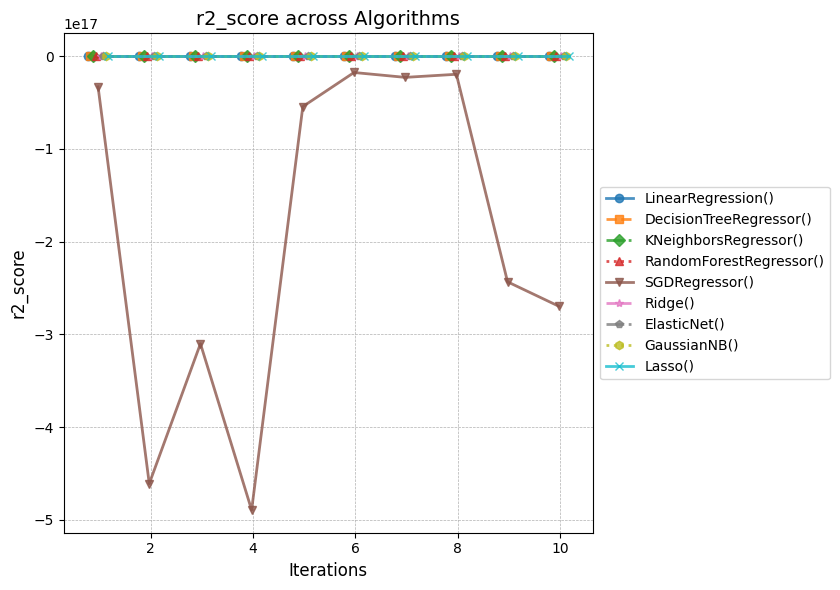

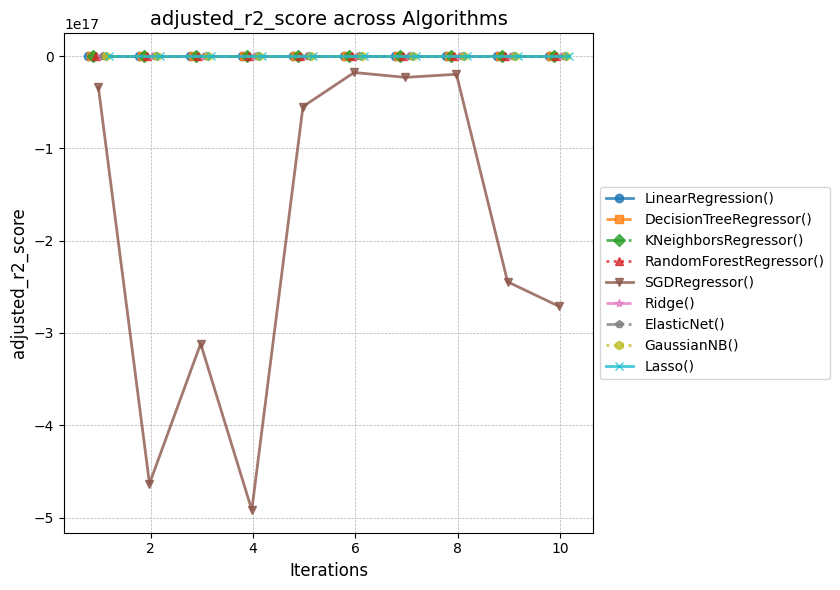

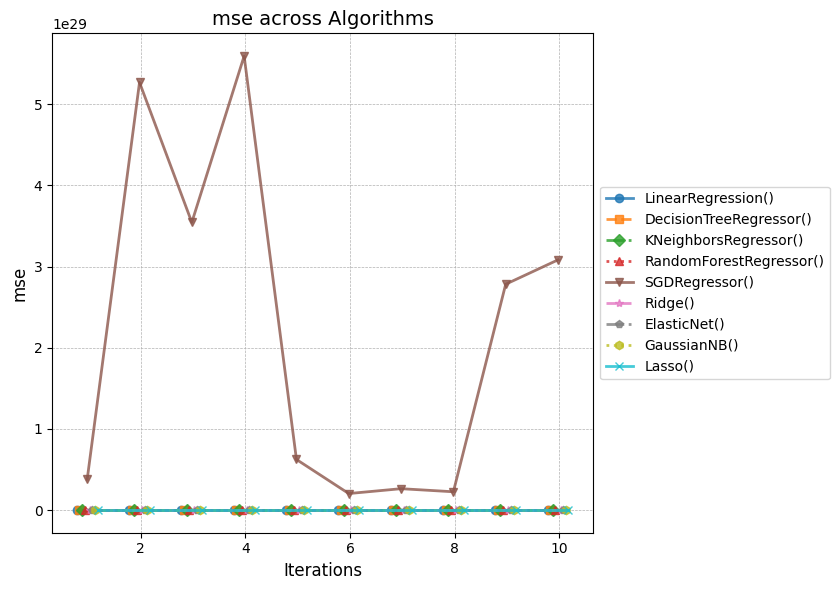

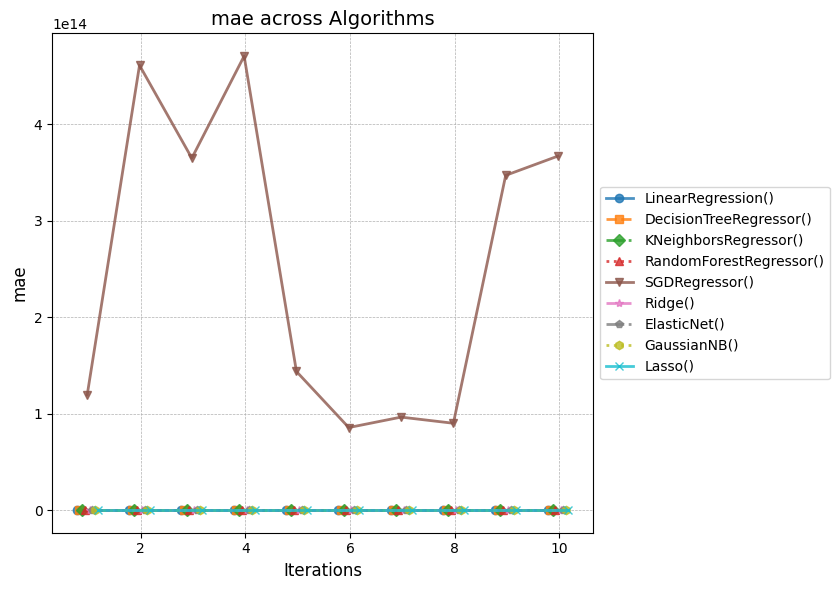

In [80]:
n_iter=10

# Extract the experiment ID
experiment_name = 'PATH6'
# Perform algorithm testing and log metrics
with mlflow.start_run(run_name="logging_metrics_5_both", experiment_id= mlflow.get_experiment_by_name(experiment_name).experiment_id) as run:
    for algo in algorithms_to_be_tested:
        for i in range(n_iter):
            algo_testing(algo=algo, test_size=0.2, X=X, Y=Y, evaluation_metric="r2_score", random_state=42, shuffle=True, iteration_number=i+1)

            
        # Calculate average metrics
        avg_accuracies[algo][0]/=n_iter
        avg_accuracies[algo][1]/=n_iter
        avg_accuracies[algo][2]/=n_iter
        avg_accuracies[algo][3]/=n_iter



    
    def plot_metrics(metrics_history,metrics,num_iterations):
        metrics = metrics # assuming fixed metric names
        num_iterations = num_iterations  # number of iterations (5 in your case)
        algorithms = list(metrics_history.keys())

        # List of colors, markers, and line styles to avoid overlap
        colors = plt.cm.get_cmap('tab10', len(algorithms))  # use a colormap
        markers = ['o', 's', 'D', '^', 'v', '*', 'p', 'h', 'x', '+']
        linestyles = ['-', '--', '-.', ':']

        # Jitter amount for x-values to avoid perfect overlap
        jitter_amount = 0.05

        # Iterate over each metric and plot for all algorithms
        for metric in metrics:
            fig_roc=plt.figure(figsize=(10, 6))

            # Plot each algorithm's data for this metric
            for i, algo in enumerate(algorithms):
                values = metrics_history[algo][metric]
                iterations = np.arange(1, num_iterations + 1)

                # Apply a small jitter to iterations to avoid overlap
                jitter = jitter_amount * (i - len(algorithms) / 2)  # Different jitter for each algorithm

                # Plot with distinct color, marker, and linestyle for each algorithm
                plt.plot(iterations + jitter, values, 
                         color=colors(i), 
                         marker=markers[i % len(markers)], 
                         linestyle=linestyles[i % len(linestyles)],
                         label=f'{algo}', linewidth=2, markersize=6, alpha=0.8)

            # Adding labels, title, and grid
            plt.xlabel('Iterations', fontsize=12)
            plt.ylabel(f'{metric}', fontsize=12)
            plt.title(f'{metric} across Algorithms', fontsize=14)
            plt.grid(True, which='both', linestyle='--', linewidth=0.5)

            # Place legend outside the plot
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

            # Adjust layout so the plot is not cropped
            plt.tight_layout(rect=[0, 0, 0.85, 1])
            plt.show()
            mlflow.log_figure(fig_roc, f"metrics/{metric}.png")
    metrics=['r2_score', 'adjusted_r2_score','mse','mae']
    num_iterations=n_iter
    plot_metrics(metrics_history,metrics,num_iterations)


mlflow.end_run()

In [370]:
metrics_history

defaultdict(<function __main__.<lambda>()>,
            {'LinearRegression()': defaultdict(list,
                         {'r2_score': [1.0,
                           1.0,
                           1.0,
                           1.0,
                           1.0,
                           1.0,
                           1.0,
                           1.0,
                           1.0,
                           1.0],
                          'adjusted_r2_score': [1.0,
                           1.0,
                           1.0,
                           1.0,
                           1.0,
                           1.0,
                           1.0,
                           1.0,
                           1.0,
                           1.0],
                          'mse': [1.7509436042817675e-18,
                           1.7509436042817675e-18,
                           1.7509436042817675e-18,
                           1.7509436042817675e-18,
                 